# Hackaton: Retail Challenge 


## Introducción: 

En este proyecto se trabajará sobre un conjunto de datos pertenecientes a la categorái de retail. 
Para esto se incluirá primero un análsis de al información donde se buscarán valores nulos y duplicados, revisando si estos datos se deben eliminar para limpiar el conjunto de datos. 
Posteriormente se realizará un análsis exploratorio donde se bsucarán datos relevantes para el negocio, dichos parámetros son: 
- Regiones más populares 
- Qué tipo de clientes compran con más frecuencia 
- Prodcutos más populares
Así mismo se busca ver que realción hay entre las diferentes variables, facilitando la visualización mediante gráficos.

Los datos contienen las siguientes columnas: 

- INVOICE_NO: Número identificador de factura 	
- STOCK_CODE: Número identificador del producto 
- DESCRIPTION: Descripción del producto 
- QUANTITY: Cantidad de productos comprados
- INVOICE_DATE: Fecha de faturación 	
- UNIT_PRICE: Precio unitario
- CUSTOMER_ID: Número identificador de usuario	
- REGION: Ubicación del usuario que realiza la compra. 


In [1]:
# Importamos librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt 
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#Obteniendo datos desde repositorio en Github 
url = "https://raw.githubusercontent.com/IamAirmanPhoenix/Hackaton-Retail-Challenge-2024/main/datasets/Online_Retail.csv"
data = pd.read_csv(url, encoding='latin1')

## Exploración inicial 
Obteniendo información general del dataset.

In [3]:
#Mostramos información de los datos 
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 194.3 MB


In [4]:
#Utilizamos método describe para obtener información estadistica general 
data.describe(include='all')

INVOICE_NO STOCK_CODE                         DESCRIPTION  \
count      541909     541909                              540455   
unique      25900       4070                                4214   
top        573585     85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq         1114       2313                                2369   
mean          NaN        NaN                                 NaN   
std           NaN        NaN                                 NaN   
min           NaN        NaN                                 NaN   
25%           NaN        NaN                                 NaN   
50%           NaN        NaN                                 NaN   
75%           NaN        NaN                                 NaN   
max           NaN        NaN                                 NaN   

             QUANTITY      INVOICE_DATE     UNIT_PRICE    CUSTOMER_ID  \
count   541909.000000            541909  541909.000000  406829.000000   
unique            NaN             23260            NaN            NaN   
top               NaN  31/10/2020 14:41            NaN            NaN   
freq              NaN              1114            NaN            NaN   
mean         9.552250               NaN       4.611114   15287.690570   
std        218.081158               NaN      96.759853    1713.600303   
min     -80995.000000               NaN  -11062.060000   12346.000000   
25%          1.000000               NaN       1.250000   13953.000000   
50%          3.000000               NaN       2.080000   15152.000000   
75%         10.000000               NaN       4.130000   16791.000000   
max      80995.000000               NaN   38970.000000   18287.000000   

                REGION  
count           541909  
unique              38  
top     United Kingdom  
freq            495478  
mean               NaN  
std                NaN  
min                NaN  
25%                NaN  
50%                NaN  
75%                NaN  
max                NaN

In [5]:
#Mostramos las primeras 10 filas del df 
data.head(10)

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365      22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365      21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366      22633               HAND WARMER UNION JACK         6   
8     536366      22632            HAND WARMER RED POLKA DOT         6   
9     536367      84879        ASSORTED COLOUR BIRD ORNAMENT        32   

       INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
0  01/12/2019 08:26        2.55      17850.0  United Kingdom  
1  01/12/2019 08:26        3.39      17850.0  United Kingdom  
2  01/12/2019 08:26        2.75      17850.0  United Kingdom  
3  01/12/2019 08:26        3.39      17850.0  United Kingdom  
4  01/12/2019 08:26        3.39      17850.0  United Kingdom  
5  01/12/2019 08:26        7.65      17850.0  United Kingdom  
6  01/12/2019 08:26        4.25      17850.0  United Kingdom  
7  01/12/2019 08:28        1.85      17850.0  United Kingdom  
8  01/12/2019 08:28        1.85      17850.0  United Kingdom  
9  01/12/2019 08:34        1.69      13047.0  United Kingdom

## Procesando la informacion

Cambiamos el nombre de las columnas y tipos de datos a los mása adecaudos para el análisis

In [6]:
#Cambio de nombres de columnas a minusculas
data.columns = data.columns.str.lower()
data.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'region'],
      dtype='object')

In [7]:
#Cambio de columna invoice_date a tipo datetime64
data['invoice_date']=pd.to_datetime(data['invoice_date'], format='%d/%m/%Y %H:%M')

In [8]:
#Cambio de columna REGION a tipo category
data['description'] = data['description'].astype('category')
data['region'] = data['region'].astype('category')

In [9]:
#Confiramamos cambios
data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  category      
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   customer_id   406829 non-null  float64       
 7   region        541909 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 83.2 MB


## Limpieza de datos

In [10]:
#Contabilizamos valores nulos 
data.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
region               0
dtype: int64

Hay valores nulos en las columnas descrition y customer_id, revisemos dichos valores 

In [11]:
data_notnull = data[data.customer_id.isnull()]

In [12]:
data_notnull.sample(30)

invoice_no stock_code                         description  quantity  \
536350     581219      23375       50'S CHRISTMAS PAPER GIFT BAG         1   
47818      540418     90214R           LETTER "R" BLING KEY RING         1   
183605     552665      22424              ENAMEL BREAD BIN CREAM         1   
496904     578347      22949  SET OF 36 DOLLY GIRL PAPER DOILIES         1   
251199     559052      21932     SCANDINAVIAN PAISLEY PICNIC BAG         2   
229960     557112      84945  MULTI COLOUR SILVER T-LIGHT HOLDER        12   
357998     568135      20726                  LUNCH BAG WOODLAND         1   
394626     570872     85099C      JUMBO  BAG BAROQUE BLACK WHITE         6   
16611      537666      22835     HOT WATER BOTTLE I AM SO POORLY         6   
210729     555321      20676                  RED RETROSPOT BOWL         4   
451063     575177     72807B  SET/3 OCEAN SCENT CANDLE JEWEL BOX         1   
435798     574076      23298                      SPOTTY BUNTING         1   
490810     578065      22918                 HERB MARKER PARSLEY         1   
286186     562024      22501          PICNIC BASKET WICKER LARGE         2   
319120     564840      23291            DOLLY GIRL CHILDRENS CUP         1   
33271      539245      22930   BAKING MOULD HEART MILK CHOCOLATE         1   
431047     573585      23341               PINK DINER WALL CLOCK         2   
379762     569700     90214S           LETTER "S" BLING KEY RING         1   
313582     564516      22654                  DELUXE SEWING KIT          1   
94872      544434      21216      SET 3 RETROSPOT TEACOFFEESUGAR         1   
24347      538349      21126  SET OF 6 GIRLS CELEBRATION CANDLES         2   
35029      539434      22423            REGENCY CAKESTAND 3 TIER         1   
377310     569545      22197                      POPCORN HOLDER         4   
220903     556237      21900                       KEY FOB  SHED         1   
370893     569202      22114   HOT WATER BOTTLE TEA AND SYMPATHY         2   
341600     566767      20977                                 NaN      -188   
501561     578827      23200                     JUMBO BAG PEARS         3   
11403      537240      20735            BLACK MINI TAPE MEASURE          1   
256557     559497      21929      JUMBO BAG PINK VINTAGE PAISLEY         1   
497169     578347      22804   PINK HANGING HEART T-LIGHT HOLDER        14   

              invoice_date  unit_price  customer_id          region  
536350 2020-12-08 09:28:00        1.63          NaN  United Kingdom  
47818  2020-01-07 11:04:00        0.85          NaN  United Kingdom  
183605 2020-05-10 15:05:00       24.96          NaN  United Kingdom  
496904 2020-11-24 09:26:00        2.92          NaN  United Kingdom  
251199 2020-07-05 16:53:00        2.46          NaN  United Kingdom  
229960 2020-06-16 16:31:00        1.80          NaN  United Kingdom  
357998 2020-09-23 17:04:00        4.13          NaN  United Kingdom  
394626 2020-10-12 16:40:00        4.13          NaN  United Kingdom  
16611  2019-12-07 18:36:00        9.32          NaN  United Kingdom  
210729 2020-06-02 11:01:00        2.46          NaN  United Kingdom  
451063 2020-11-08 18:41:00        8.29          NaN  United Kingdom  
435798 2020-11-02 15:38:00       10.79          NaN  United Kingdom  
490810 2020-11-22 15:41:00        1.63          NaN  United Kingdom  
286186 2020-08-01 16:07:00       20.79          NaN  United Kingdom  
319120 2020-08-30 12:49:00        2.46          NaN  United Kingdom  
33271  2019-12-16 13:25:00        2.55          NaN  United Kingdom  
431047 2020-10-31 14:41:00       16.63          NaN  United Kingdom  
379762 2020-10-05 15:56:00        0.83          NaN  United Kingdom  
313582 2020-08-25 14:45:00       12.46          NaN  United Kingdom  
94872  2020-02-18 16:12:00       10.79          NaN  United Kingdom  
24347  2019-12-10 14:59:00        2.51          NaN  United Kingdom  
35029  2019-12-17 14:41:00       25.49          

In [13]:
#Descartamos las filas con valores ausentes en la columna "customer_id" mediante el método isna() 
data_filtered = data[~data['customer_id'].isna()]
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  category      
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   customer_id   406829 non-null  float64       
 7   region        406829 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 23.1+ MB


In [14]:
#Comprobamos cantidad de datos perdidos 
#Unimos el df principal y el df filtrado en con el método concat() 
new_df = pd.concat([data['region'].value_counts(), data_filtered['region'].value_counts()], axis=1).fillna(0.0)
#Definimos columnas
new_df.columns = ['total', 'filtered']
new_df['filtered'] = new_df['filtered'].astype(int)
#Agragamos proporción para conocer el número de datos
new_df['ratio %'] = (new_df['filtered'] / new_df['total'])*100
new_df = new_df.sort_values('ratio %', ascending=False)
#Mostramos df 
display(new_df)

total  filtered     ratio %
region                                            
Japan                    358       358  100.000000
Malta                    127       127  100.000000
Poland                   341       341  100.000000
USA                      291       291  100.000000
Singapore                229       229  100.000000
Iceland                  182       182  100.000000
Canada                   151       151  100.000000
Greece                   146       146  100.000000
United Arab Emirates      68        68  100.000000
Denmark                  389       389  100.000000
European Community        61        61  100.000000
RSA                       58        58  100.000000
Lebanon                   45        45  100.000000
Lithuania                 35        35  100.000000
Brazil                    32        32  100.000000
Czech Republic            30        30  100.000000
Germany                 9495      9495  100.000000
Saudi Arabia              10        10  100.000000
Austria                  401       401  100.000000
Channel Islands          758       758  100.000000
Spain                   2533      2533  100.000000
Netherlands             2371      2371  100.000000
Belgium                 2069      2069  100.000000
Norway                  1086      1086  100.000000
Italy                    803       803  100.000000
Australia               1259      1259  100.000000
Finland                  695       695  100.000000
Cyprus                   622       622  100.000000
Sweden                   462       462  100.000000
France                  8557      8491   99.228702
Portugal                1519      1480   97.432521
Switzerland             2002      1877   93.756244
EIRE                    8196      7485   91.325037
Bahrain                   19        17   89.473684
Israel                   297       250   84.175084
United Kingdom        495478    361878   73.036139
Unspecified              446       244   54.708520
Hong Kong                288         0    0.000000

Observamos que en la mayoría de los casos, se obtuvo un resultado donde el 100% de los datos se matuvo, en los demás casos se dió un porcentaje por arriba del 70%
A excepción de dos casos específicos:
Hong Kong, donde se perideron los datos 
Unspecified, donde se mantuv el 54% de los datos
Se revisan ambos casos a continuación

In [15]:
#Filtramos datos para Hong kong y mostramos en un df 
data_hongkong = data.query('region == "Hong Kong"')
data_hongkong

invoice_no stock_code                          description  quantity  \
69623      541975      22620          4 TRADITIONAL SPINNING TOPS        60   
69624      541975     85183B  CHARLIE & LOLA WASTEPAPER BIN FLORA         6   
69625      541975     85183A   CHARLIE & LOLA WASTEPAPER BIN BLUE         6   
69626      541975      16236                 KITTY PENCIL ERASERS        28   
69627      541975      21058               PARTY INVITES WOODLAND        12   
...           ...        ...                                  ...       ...   
423776     573154      22452         MEASURING TAPE BABUSHKA PINK        30   
423777     573154      22492              MINI PAINT SET VINTAGE         36   
423778     573154      23328   SET 6 SCHOOL MILK BOTTLES IN CRATE         8   
465423    C576233          M                               Manual        -1   
465424     576234          M                               Manual         1   

              invoice_date  unit_price  customer_id     region  
69623  2020-01-24 14:24:00        1.25          NaN  Hong Kong  
69624  2020-01-24 14:24:00        3.75          NaN  Hong Kong  
69625  2020-01-24 14:24:00        3.75          NaN  Hong Kong  
69626  2020-01-24 14:24:00        0.21          NaN  Hong Kong  
69627  2020-01-24 14:24:00        0.85          NaN  Hong Kong  
...                    ...         ...          ...        ...  
423776 2020-10-28 08:20:00        2.95          NaN  Hong Kong  
423777 2020-10-28 08:20:00        0.65          NaN  Hong Kong  
423778 2020-10-28 08:20:00        3.75          NaN  Hong Kong  
465423 2020-11-14 13:26:00      326.10          NaN  Hong Kong  
465424 2020-11-14 13:27:00      326.10          NaN  Hong Kong  

[288 rows x 8 columns]

In [16]:
#Mostarmos información de df de Hong Kong
data_hongkong.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 69623 to 465424
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_no    288 non-null    object        
 1   stock_code    288 non-null    object        
 2   description   288 non-null    category      
 3   quantity      288 non-null    int64         
 4   invoice_date  288 non-null    datetime64[ns]
 5   unit_price    288 non-null    float64       
 6   customer_id   0 non-null      float64       
 7   region        288 non-null    category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 179.9+ KB


Observamos que no hay usuarios en Hong Kong, por lo que los registros para esta región pueden tener algún error, por ende se considera deben ser igualmente eliminados, o bien cambiar el nombre de estos a Unknown ya que si se realizaron compras dentro de esta región donde el problema es el nombre de usuario no registrado, sin embargo al no tener información sobre cauntos usuarios hay en dicha región se opta por ignorarla ya que no se podría realziar un análisis adecuado.

In [17]:
#Filtramos datos para Unspecified y mostramos en un df 
data_unspecified = data.query('region == "Unspecified"')
data_unspecified

invoice_no stock_code                          description  quantity  \
152712     549687      20685                DOORMAT RED RETROSPOT         2   
152713     549687      22691              DOORMAT WELCOME SUNRISE         2   
152714     549687      48116           DOORMAT MULTICOLOUR STRIPE         2   
152715     549687      21213          PACK OF 72 SKULL CAKE CASES        24   
152716     549687      21977   PACK OF 60 PINK PAISLEY CAKE CASES        24   
...           ...        ...                                  ...       ...   
498778     578539      22560           TRADITIONAL MODELLING CLAY        24   
498779     578539      23570     TRADITIONAL PICK UP STICKS GAME         12   
498780     578539      23571        TRADITIONAL NAUGHTS & CROSSES        12   
498781     578539      84992       72 SWEETHEART FAIRY CAKE CASES        24   
498782     578539      23309  SET OF 60 I LOVE LONDON CAKE CASES         24   

              invoice_date  unit_price  customer_id       region  
152712 2020-04-11 13:29:00        7.95      12363.0  Unspecified  
152713 2020-04-11 13:29:00        7.95      12363.0  Unspecified  
152714 2020-04-11 13:29:00        7.95      12363.0  Unspecified  
152715 2020-04-11 13:29:00        0.55      12363.0  Unspecified  
152716 2020-04-11 13:29:00        0.55      12363.0  Unspecified  
...                    ...         ...          ...          ...  
498778 2020-11-24 14:55:00        1.25          NaN  Unspecified  
498779 2020-11-24 14:55:00        1.25          NaN  Unspecified  
498780 2020-11-24 14:55:00        1.65          NaN  Unspecified  
498781 2020-11-24 14:55:00        0.55          NaN  Unspecified  
498782 2020-11-24 14:55:00        0.55          NaN  Unspecified  

[446 rows x 8 columns]

In [18]:
data_unspecified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446 entries, 152712 to 498782
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_no    446 non-null    object        
 1   stock_code    446 non-null    object        
 2   description   446 non-null    category      
 3   quantity      446 non-null    int64         
 4   invoice_date  446 non-null    datetime64[ns]
 5   unit_price    446 non-null    float64       
 6   customer_id   244 non-null    float64       
 7   region        446 non-null    category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 189.0+ KB


Igualmente en el caso de Hong Kong vemos que los valores ausentes si corresponden a compras, sin embargo a diferencia del caso anterior aquí aún tenemos datos para poder realizar un análisis, por lo que en este caso, se opta por eliminar estos valores.

Para facilitar el análsisis y comunicación de la información se cambia el nombre de la región "Unspecified" a "Others", para efectos de análsisi a partir de ahora se trabajará con el df "data_filtered" en lugar de "data"

In [19]:
#Cambiamos valores para data_filtered
data_filtered.region = data_filtered.region.replace({"Unspecified": "Other"})

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15864\320171035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.region = data_filtered.region.replace({"Unspecified": "Other"})


In [20]:
data_filtered.query('region == "Other"')

invoice_no stock_code                         description  quantity  \
152712     549687      20685               DOORMAT RED RETROSPOT         2   
152713     549687      22691             DOORMAT WELCOME SUNRISE         2   
152714     549687      48116          DOORMAT MULTICOLOUR STRIPE         2   
152715     549687      21213         PACK OF 72 SKULL CAKE CASES        24   
152716     549687      21977  PACK OF 60 PINK PAISLEY CAKE CASES        24   
...           ...        ...                                 ...       ...   
308810     564051      23007              SPACEBOY BABY GIFT SET         1   
308811     564051      21833                CAMOUFLAGE LED TORCH        12   
308812     564051      23081       GREEN METAL BOX ARMY SUPPLIES         2   
308813     564051      23046   PAPER LANTERN 9 POINT DELUXE STAR         2   
308814     564051      23045    PAPER LANTERN 5 POINT STAR MOON          4   

              invoice_date  unit_price  customer_id region  
152712 2020-04-11 13:29:00        7.95      12363.0  Other  
152713 2020-04-11 13:29:00        7.95      12363.0  Other  
152714 2020-04-11 13:29:00        7.95      12363.0  Other  
152715 2020-04-11 13:29:00        0.55      12363.0  Other  
152716 2020-04-11 13:29:00        0.55      12363.0  Other  
...                    ...         ...          ...    ...  
308810 2020-08-22 13:32:00       16.95      14265.0  Other  
308811 2020-08-22 13:32:00        1.69      14265.0  Other  
308812 2020-08-22 13:32:00        8.25      14265.0  Other  
308813 2020-08-22 13:32:00        6.65      14265.0  Other  
308814 2020-08-22 13:32:00        4.15      14265.0  Other  

[244 rows x 8 columns]

In [21]:
#Revisamos iformación del df
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  category      
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   customer_id   406829 non-null  float64       
 7   region        406829 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 23.1+ MB


In [22]:
#Revision de valores duplicados 
data_filtered.duplicated().value_counts()

False    401604
True       5225
Name: count, dtype: int64

In [23]:
#Revisamos cuales son los valores duplicados
df_duplicated = data_filtered[data_filtered.duplicated(keep=False)]
#Revisamos los valores duplciados en una lista
df_duplicated = df_duplicated.groupby(df_duplicated.columns.tolist()).apply(lambda x: x.index.tolist()).values.tolist()
df_duplicated

[[494, 517],
 [485, 539],
 [489, 527],
 [521, 537],
 [578, 598],
 [565, 601, 604],
 [612, 618],
 [607, 616],
 [574, 594],
 [556, 587],
 [548, 555],
 [597, 600],
 [569, 589],
 [611, 617],
 [603, 605],
 [615, 620],
 [757, 758],
 [808, 852],
 [829, 831, 859],
 [813, 835],
 [890, 891],
 [1036, 1061],
 [1062, 1067],
 [1136, 1169],
 [1133, 1159],
 [1161, 1166],
 [1160, 1167],
 [1132, 1179],
 [1125, 1140],
 [1162, 1165],
 [1128, 1172],
 [1129, 1153],
 [1201, 1205],
 [1217, 1222],
 [1998, 2019],
 [2003, 2015],
 [1999, 2020],
 [1996, 2002],
 [2070, 2085],
 [2105, 2106],
 [2209, 2213],
 [2190, 2195],
 [3538, 3541],
 [3582, 3595],
 [3546, 3553],
 [3548, 3601],
 [3558, 3596],
 [3539, 3571],
 [3584, 3589],
 [3583, 3590],
 [3970, 4004],
 [4118, 4122, 4147],
 [4126, 4133, 4156],
 [4132, 4158],
 [4124, 4142],
 [4138, 4145],
 [4115, 4121],
 [4615, 4672],
 [4595, 4601],
 [4591, 4648],
 [4602, 4658],
 [4577, 4632, 4639],
 [4575, 4642],
 [4628, 4641],
 [4596, 4598],
 [4600, 4638],
 [4661, 4663],
 [4607, 4

Tomamos 5 ejemplos para revisar valores duplicados:

- 494, 517
- 574, 594
- 1133, 1159
- 829, 831, 859
- 124160, 124167

In [24]:
#Ubicamos el indice de los valores duplcados
print(data_filtered.iloc[494]) 
print('*'*50)
print(data_filtered.iloc[517]) 


invoice_no                           536409
stock_code                            21866
description     UNION JACK FLAG LUGGAGE TAG
quantity                                  1
invoice_date            2019-12-01 11:45:00
unit_price                             1.25
customer_id                         17908.0
region                       United Kingdom
Name: 494, dtype: object
**************************************************
invoice_no                           536409
stock_code                            21866
description     UNION JACK FLAG LUGGAGE TAG
quantity                                  1
invoice_date            2019-12-01 11:45:00
unit_price                             1.25
customer_id                         17908.0
region                       United Kingdom
Name: 517, dtype: object


In [25]:
print(data_filtered.iloc[574]) 
print('*'*50)
print(data_filtered.iloc[594]) 

invoice_no                              536412
stock_code                               22141
description     CHRISTMAS CRAFT TREE TOP ANGEL
quantity                                     1
invoice_date               2019-12-01 11:49:00
unit_price                                 2.1
customer_id                            17920.0
region                          United Kingdom
Name: 574, dtype: object
**************************************************
invoice_no                              536412
stock_code                               22141
description     CHRISTMAS CRAFT TREE TOP ANGEL
quantity                                     1
invoice_date               2019-12-01 11:49:00
unit_price                                 2.1
customer_id                            17920.0
region                          United Kingdom
Name: 594, dtype: object


In [26]:
print(data_filtered.iloc[1132]) 
print('*'*50)
print(data_filtered.iloc[1158]) 

invoice_no                              536528
stock_code                               22584
description     PACK OF 6 PANNETONE GIFT BOXES
quantity                                     2
invoice_date               2019-12-01 13:17:00
unit_price                                2.55
customer_id                            15525.0
region                          United Kingdom
Name: 1133, dtype: object
**************************************************
invoice_no                              536528
stock_code                               22584
description     PACK OF 6 PANNETONE GIFT BOXES
quantity                                     2
invoice_date               2019-12-01 13:17:00
unit_price                                2.55
customer_id                            15525.0
region                          United Kingdom
Name: 1159, dtype: object


In [27]:
print(data_filtered.iloc[828]) 
print('*'*50)
print(data_filtered.iloc[830]) 
print('*'*50)
print(data_filtered.iloc[858]) 

invoice_no                             536464
stock_code                              22866
description     HAND WARMER SCOTTY DOG DESIGN
quantity                                    1
invoice_date              2019-12-01 12:23:00
unit_price                                2.1
customer_id                           17968.0
region                         United Kingdom
Name: 829, dtype: object
**************************************************
invoice_no                             536464
stock_code                              22866
description     HAND WARMER SCOTTY DOG DESIGN
quantity                                    1
invoice_date              2019-12-01 12:23:00
unit_price                                2.1
customer_id                           17968.0
region                         United Kingdom
Name: 831, dtype: object
**************************************************
invoice_no                             536464
stock_code                              22866
description     HAND

Al revisar los indices podemos observar que los datos duplcados no corresponden a facturas o prodcutos diferentes y efectivamente son errores de regsitro, por lo que se procede a eliminarlos

In [28]:
data_filtered = data_filtered.drop_duplicates()

In [29]:
data_filtered.duplicated().value_counts()

False    401604
Name: count, dtype: int64

In [30]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    401604 non-null  object        
 1   stock_code    401604 non-null  object        
 2   description   401604 non-null  category      
 3   quantity      401604 non-null  int64         
 4   invoice_date  401604 non-null  datetime64[ns]
 5   unit_price    401604 non-null  float64       
 6   customer_id   401604 non-null  float64       
 7   region        401604 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 22.8+ MB


Revisión de valores 

In [31]:
#Obtenemos valores únicos en la columna description para revisar duplcaidos poco evidentes
unique = data_filtered['description'].unique()
unique

['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', ..., 'LETTER "W" BLING KEY RING', 'LETTER "Z" BLING KEY RING', 'PINK CRYSTAL SKULL PHONE CHARM', 'CREAM HANGING HEART T-LIGHT HOLDER', 'PAPER CRAFT  LITTLE BIRDIE']
Length: 3887
Categories (4214, object): [' 4 PURPLE FLOCK DINNER CANDLES', ' 50'S CHRISTMAS GIFT BAG LARGE', ' DOLLY GIRL BEAKER', ' I LOVE LONDON MINI BACKPACK', ..., 'wrongly marked. 23343 in box', 'wrongly sold (22719) barcode', 'wrongly sold as sets', 'wrongly sold sets']

Al parecer no hay valores duplicados en la categoría sin embargo, hay algunos elementos que llaman la atención como son aquellos con la palabra wrongly, por lo que se procede a revisarlos

In [32]:
data.query('description == "wrongly marked. 23343 in box"')

invoice_no stock_code                   description  quantity  \
263884     560039      20713  wrongly marked. 23343 in box     -3100   

              invoice_date  unit_price  customer_id          region  
263884 2020-07-14 14:27:00         0.0          NaN  United Kingdom

In [33]:
data.query('description == "wrongly sold (22719) barcode"')

invoice_no stock_code                   description  quantity  \
117895     546408      22467  wrongly sold (22719) barcode       170   

              invoice_date  unit_price  customer_id          region  
117895 2020-03-11 16:25:00         0.0          NaN  United Kingdom

In [34]:
data.query('description == "wrongly sold as sets"')

invoice_no stock_code           description  quantity  \
114522     546018      85172  wrongly sold as sets      -600   

              invoice_date  unit_price  customer_id          region  
114522 2020-03-08 17:23:00         0.0          NaN  United Kingdom

In [35]:
data.query('description == "wrongly sold  sets"') 

Empty DataFrame
Columns: [invoice_no, stock_code, description, quantity, invoice_date, unit_price, customer_id, region]
Index: []

Observamos que en este caso la mayoría contienen usuarios ausentes los cuales fueron eliminados, o bien valores negativos, en este caso se puede suponer que pertenencen a devoluciones o errores de sistema, sin embargo al no tener información suficiente para conlcuir dicha afirmación también se filtran estos datos.

In [36]:
#Eliminar cantidades negativas
data_filtered2 = data_filtered[data_filtered['unit_price'] >= 0]

In [37]:
data_filtered2 = data_filtered2[data_filtered2['quantity'] >= 0]

In [38]:
data_filtered2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    392732 non-null  object        
 1   stock_code    392732 non-null  object        
 2   description   392732 non-null  category      
 3   quantity      392732 non-null  int64         
 4   invoice_date  392732 non-null  datetime64[ns]
 5   unit_price    392732 non-null  float64       
 6   customer_id   392732 non-null  float64       
 7   region        392732 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 22.3+ MB


In [39]:
# Convertir los nombres de las columnas a minúsculas
data_filtered2.columns = data_filtered2.columns.str.lower()
data_filtered2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    392732 non-null  object        
 1   stock_code    392732 non-null  object        
 2   description   392732 non-null  category      
 3   quantity      392732 non-null  int64         
 4   invoice_date  392732 non-null  datetime64[ns]
 5   unit_price    392732 non-null  float64       
 6   customer_id   392732 non-null  float64       
 7   region        392732 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 22.3+ MB


In [40]:
# Calcular la columna 'amount' como cantidad * precio unitario
data_filtered2['amount'] = data_filtered2['quantity'] * data_filtered2['unit_price']
data_filtered2.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         invoice_date  unit_price  customer_id          region  amount  
0 2019-12-01 08:26:00        2.55      17850.0  United Kingdom   15.30  
1 2019-12-01 08:26:00        3.39      17850.0  United Kingdom   20.34  
2 2019-12-01 08:26:00        2.75      17850.0  United Kingdom   22.00  
3 2019-12-01 08:26:00        3.39      17850.0  United Kingdom   20.34  
4 2019-12-01 08:26:00        3.39      17850.0  United Kingdom   20.34

In [41]:
#Vrificamos información del dataset
data_filtered2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    392732 non-null  object        
 1   stock_code    392732 non-null  object        
 2   description   392732 non-null  category      
 3   quantity      392732 non-null  int64         
 4   invoice_date  392732 non-null  datetime64[ns]
 5   unit_price    392732 non-null  float64       
 6   customer_id   392732 non-null  float64       
 7   region        392732 non-null  category      
 8   amount        392732 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 25.3+ MB


## Análisis exploratorio

In [42]:
# Resumen estadístico básico de las variables numéricas
data_filtered2.describe().T

count                           mean                  min  \
quantity      392732.0                      13.153718                  1.0   
invoice_date    392732  2020-07-10 15:12:03.132059136  2019-12-01 08:26:00   
unit_price    392732.0                       3.125596                  0.0   
customer_id   392732.0                   15287.734822              12346.0   
amount        392732.0                      22.629195                  0.0   

                              25%                  50%                  75%  \
quantity                      2.0                  6.0                 12.0   
invoice_date  2020-04-07 11:12:00  2020-07-31 12:02:00  2020-10-20 12:53:00   
unit_price                   1.25                 1.95                 3.75   
customer_id               13955.0              15150.0              16791.0   
amount                       4.95                12.39                 19.8   

                              max          std  
quantity                  80995.0    181.58842  
invoice_date  2020-12-09 12:50:00          NaN  
unit_price                8142.75    22.240725  
customer_id               18287.0  1713.567773  
amount                   168469.6   311.083465

Observamos que en la descripción el valor máximo se aleja bastante de la media, por lo que por lo que podríamos considerar valores atípicos. 


### AnálIsis número de facturas por país

In [43]:
# Conteo de facturas por país (region)
facturas_por_pais = data_filtered2.groupby('region')['invoice_no'].nunique().reset_index()
facturas_por_pais.columns = ['Region', 'Numero de Facturas']

# Ordenar por mayor número de facturas
facturas_por_pais = facturas_por_pais.sort_values(by='Numero de Facturas', ascending=False)

# Mostrar tabla de número de facturas por país ordenado
print("Número de facturas por país (ordenado por mayor número de facturas):")
facturas_por_pais

Número de facturas por país (ordenado por mayor número de facturas):


Region  Numero de Facturas
36        United Kingdom               16649
14               Germany                 457
13                France                 389
10                  EIRE                 260
3                Belgium                  98
24           Netherlands                  95
31                 Spain                  90
0              Australia                  57
27              Portugal                  57
33           Switzerland                  51
12               Finland                  41
19                 Italy                  38
25                Norway                  36
32                Sweden                  36
6        Channel Islands                  26
20                 Japan                  19
26                Poland                  19
9                Denmark                  18
1                Austria                  17
7                 Cyprus                  16
37                 Other                   8
17               Iceland                   7
30             Singapore                   7
5                 Canada                   6
34                   USA                   5
23                 Malta                   5
18                Israel                   5
15                Greece                   5
11    European Community                   4
22             Lithuania                   4
35  United Arab Emirates                   3
2                Bahrain                   2
8         Czech Republic                   2
21               Lebanon                   1
4                 Brazil                   1
28                   RSA                   1
29          Saudi Arabia                   1
16             Hong Kong                   0

In [44]:
# Conteo de clientes por país (region)
clientes_por_pais = data_filtered2.groupby('region')['customer_id'].nunique().reset_index()
clientes_por_pais.columns = ['Region', 'Numero de clientes']

# Ordenar por mayor número 
clientes_por_pais = clientes_por_pais.sort_values(by='Numero de clientes', ascending=False)

# Mostrar tabla de número de clientes por país ordenado
print("Número de clientes por país (ordenado por mayor número de facturas):")
clientes_por_pais

Número de clientes por país (ordenado por mayor número de facturas):


Region  Numero de clientes
36        United Kingdom                3921
14               Germany                  94
13                France                  87
31                 Spain                  30
3                Belgium                  25
33           Switzerland                  21
27              Portugal                  19
19                 Italy                  14
12               Finland                  12
1                Austria                  11
25                Norway                  10
24           Netherlands                   9
0              Australia                   9
6        Channel Islands                   9
9                Denmark                   9
7                 Cyprus                   8
32                Sweden                   8
20                 Japan                   8
26                Poland                   6
34                   USA                   4
5                 Canada                   4
37                 Other                   4
15                Greece                   4
10                  EIRE                   3
18                Israel                   3
23                 Malta                   2
35  United Arab Emirates                   2
2                Bahrain                   2
22             Lithuania                   1
8         Czech Republic                   1
21               Lebanon                   1
28                   RSA                   1
29          Saudi Arabia                   1
30             Singapore                   1
17               Iceland                   1
4                 Brazil                   1
11    European Community                   1
16             Hong Kong                   0

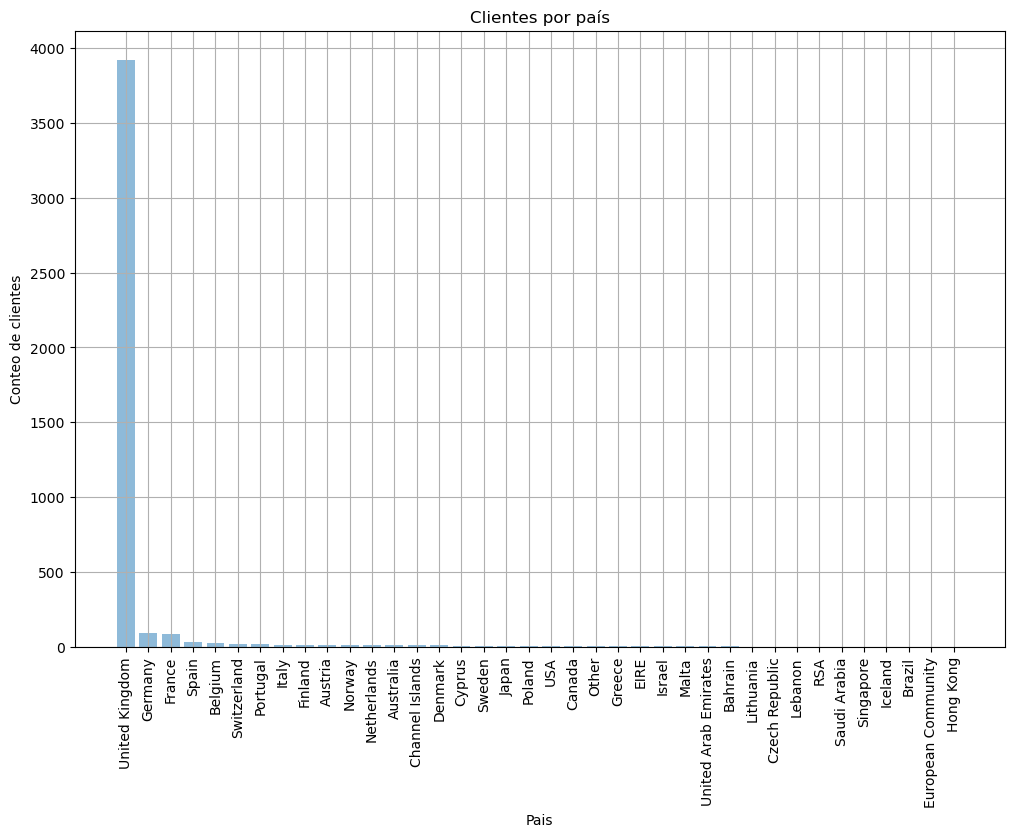

In [45]:
plt.figure(figsize=(12, 8))
plt.bar(clientes_por_pais['Region'], clientes_por_pais['Numero de clientes'], alpha=0.5, )
plt.title('Clientes por país')
plt.xlabel('Pais')
plt.ylabel('Conteo de clientes')
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

La mayoria de clientes viene de reino unido, agrupandose todos en Europa, observamos que el mercado de Australia está por debajo superando sin embargo al mercado de Norteamérica, siendo el mercado asiático el que menos clientes tiene.

### Analisis Monto Total por País

In [46]:
monto_total_por_pais = data_filtered2.groupby('region')['amount'].sum().reset_index()
monto_total_por_pais.columns = ['País', 'Monto Total']

# Ordenar por monto total descendente
monto_total_por_pais = monto_total_por_pais.sort_values(by='Monto Total', ascending=False)

# Mostrar tabla de monto total por país
print("Monto total por país:")
monto_total_por_pais

Monto total por país:


País  Monto Total
36        United Kingdom  7285024.644
24           Netherlands   285446.340
10                  EIRE   265262.460
14               Germany   228678.400
13                France   208934.310
0              Australia   138453.810
31                 Spain    61558.560
33           Switzerland    56443.950
3                Belgium    41196.340
32                Sweden    38367.830
20                 Japan    37416.370
25                Norway    36165.440
27              Portugal    33375.840
12               Finland    22546.080
30             Singapore    21279.290
6        Channel Islands    20440.540
9                Denmark    18955.340
19                 Italy    17483.240
7                 Cyprus    13502.850
1                Austria    10198.680
26                Poland     7334.650
18                Israel     7215.840
15                Greece     4760.520
17               Iceland     4310.000
5                 Canada     3666.380
34                   USA     3580.390
23                 Malta     2725.590
37                 Other     2660.770
35  United Arab Emirates     1902.280
21               Lebanon     1693.880
22             Lithuania     1661.060
11    European Community     1300.250
4                 Brazil     1143.600
28                   RSA     1002.310
8         Czech Republic      826.740
2                Bahrain      548.400
29          Saudi Arabia      145.920
16             Hong Kong        0.000

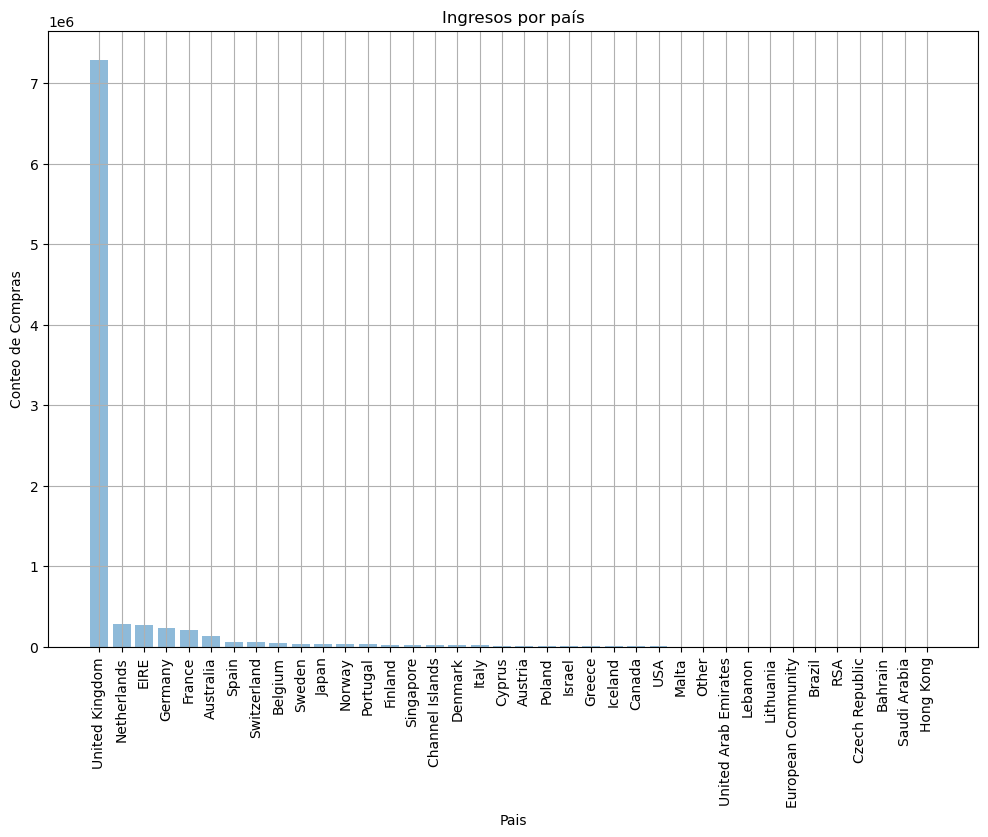

In [47]:
plt.figure(figsize=(12, 8))
plt.bar(monto_total_por_pais['País'], monto_total_por_pais['Monto Total'], alpha=0.5, )
plt.title('Ingresos por país')
plt.xlabel('Pais')
plt.ylabel('Conteo de Compras')
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

Observamos que la gran mayoría de clientes provienen de Reino Unido, los demás en mucho menor medida provienen de Europa y Australia, obervamos que las regiones de Asia son las que menor cantidad de  compras tiene.
Obervamos que Hong Kong es la región con menor cantidad de ventas, siendo la zona de Oriente la que menor ingresos obtiene.
Curiosamente observamos que Australia a pesar de no pertenecer a la zona de Europa representa un cliente potencial. 
Finalmente vemos que para el mercado asiático el principal comprador es Japón.

### Análisis de número de facturas por mes

In [48]:
# Crear una nueva columna 'Month' para el mes de cada factura
data_filtered2['Month'] = data_filtered2['invoice_date'].dt.month

# Conteo de facturas por mes
facturas_por_mes = data_filtered2.groupby('Month')['invoice_no'].nunique().reset_index()
facturas_por_mes.columns = ['Mes', 'Número de Facturas']

# Mostrar tabla de número de facturas por mes
print("Número de facturas generadas por mes:")
facturas_por_mes

Número de facturas generadas por mes:


Mes  Número de Facturas
0     1                 987
1     2                 998
2     3                1321
3     4                1149
4     5                1555
5     6                1393
6     7                1331
7     8                1281
8     9                1756
9    10                1929
10   11                2658
11   12                2178

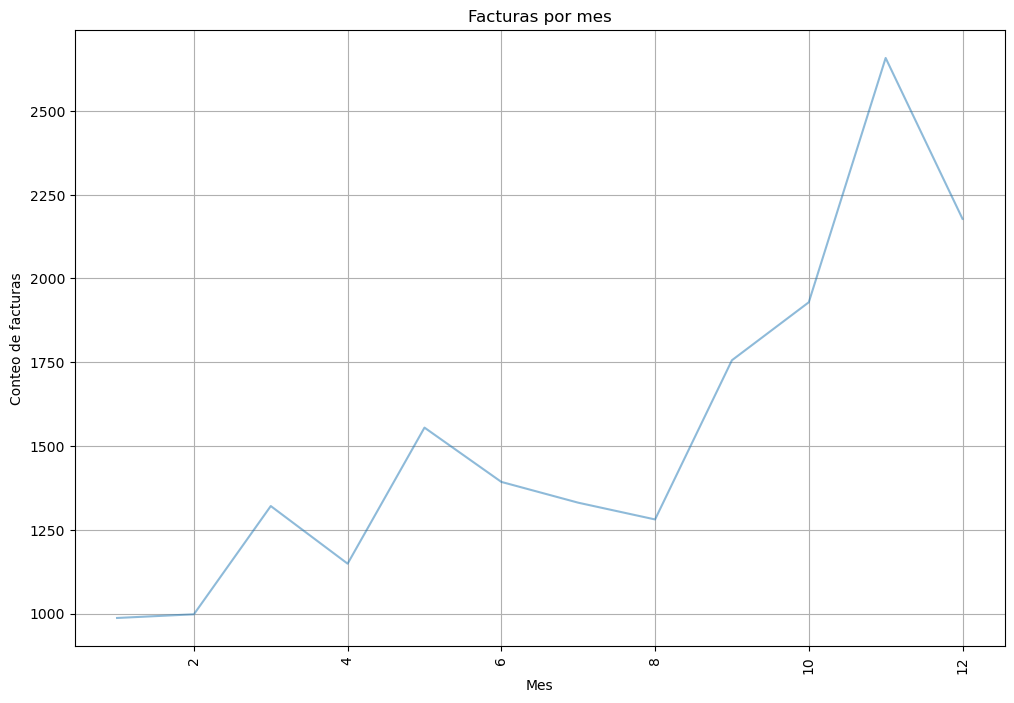

In [49]:
plt.figure(figsize=(12, 8))
plt.plot(facturas_por_mes['Mes'], facturas_por_mes['Número de Facturas'], alpha=0.5, )
plt.title('Facturas por mes')
plt.xlabel('Mes')
plt.ylabel('Conteo de facturas')
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

Observamos que el mes donde se realizan la mayor cantidad de pedidos en el noviembre, y en menor medida en diciembre, siendo que las ventas bajan de manera muy considerable en enero alcanzando su punto mínimo oocuurriendo lo mismo en febrero, repuntando después del mes de agosto.

### Análisis de la Cantidad de Clientes Nuevos por mes

In [50]:
# Ordenar los datos por fecha de factura
data_filtered2 = data_filtered2.sort_values(by='invoice_date')

# Encontrar la primera compra de cada cliente
primer_compra_por_cliente = data_filtered2.groupby('customer_id')['invoice_date'].min().reset_index()

# Crear una nueva columna 'month_first_purchase' para el mes de la primera compra de cada cliente
primer_compra_por_cliente['month_first_purchase'] = primer_compra_por_cliente['invoice_date'].dt.month

# Contar la cantidad de clientes nuevos por mes
clientes_nuevos_por_mes = primer_compra_por_cliente.groupby('month_first_purchase').size().reset_index()
clientes_nuevos_por_mes.columns = ['Mes', 'Clientes Nuevos']

# Mostrar tabla de cantidad de clientes nuevos por mes
print("Cantidad de clientes nuevos por mes:")
clientes_nuevos_por_mes

Cantidad de clientes nuevos por mes:


Mes  Clientes Nuevos
0     1              417
1     2              380
2     3              452
3     4              300
4     5              284
5     6              242
6     7              188
7     8              169
8     9              299
9    10              358
10   11              324
11   12              926

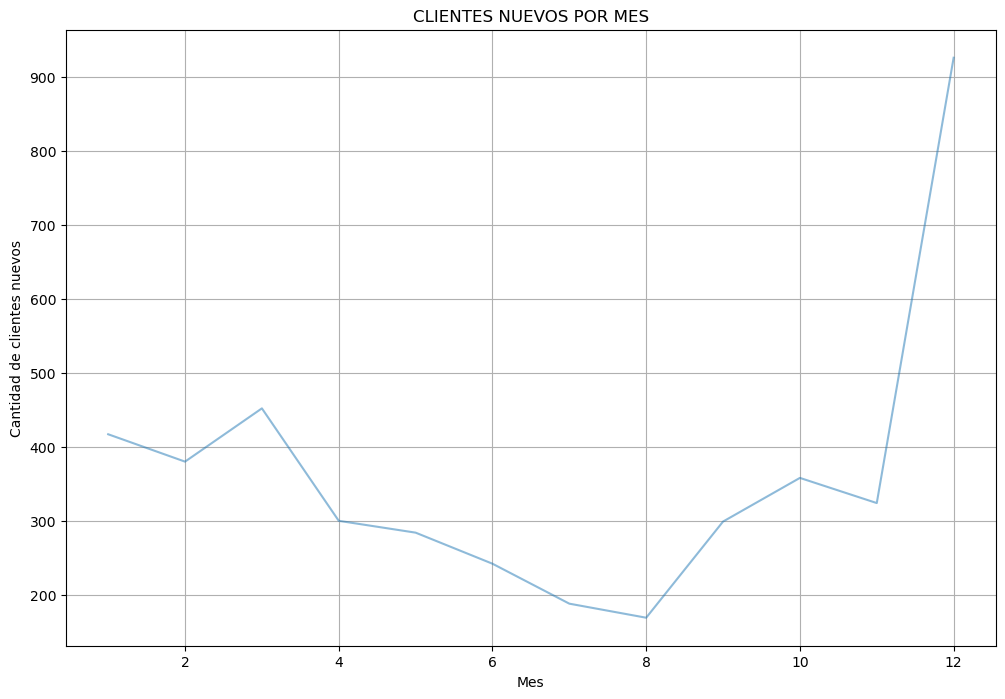

In [51]:
plt.figure(figsize=(12, 8))
plt.plot(clientes_nuevos_por_mes['Mes'], clientes_nuevos_por_mes['Clientes Nuevos'], alpha=0.5, )
plt.title('CLIENTES NUEVOS POR MES')
plt.xlabel('Mes')
plt.ylabel('Cantidad de clientes nuevos')
plt.grid(True)
plt.xticks(rotation = 0)
plt.show()

En agosto es cuando menos clientes nuevos hay, aunque diciembre es donde menos clientes existen, teniendo algunos clientes nuevos en el primer trimestre del año, para este caso sería  interesante analizar datos de fechas futuras para saber si esta tendencia se mantiene. La parte fluctuante es a medidos de año, pues observando las ventas, vemos que los cleintes existentes comienzan a comprar de nuevo.

### Analisis del monto total de ventas por mes

In [52]:
# Calcular el monto total de ventas por mes
ventas_por_mes = data_filtered2.groupby('Month')['amount'].sum().reset_index()
ventas_por_mes.columns = ['Mes', 'Monto Total de Ventas']

# Mostrar tabla de monto total de ventas por mes
print("Monto total de ventas por mes:")
ventas_por_mes

Monto total de ventas por mes:


Mes  Monto Total de Ventas
0     1             568101.310
1     2             446084.920
2     3             594081.760
3     4             468374.331
4     5             677355.150
5     6             660046.050
6     7             598962.901
7     8             644051.040
8     9             950690.202
9    10            1035642.450
10   11            1156205.610
11   12            1087613.170

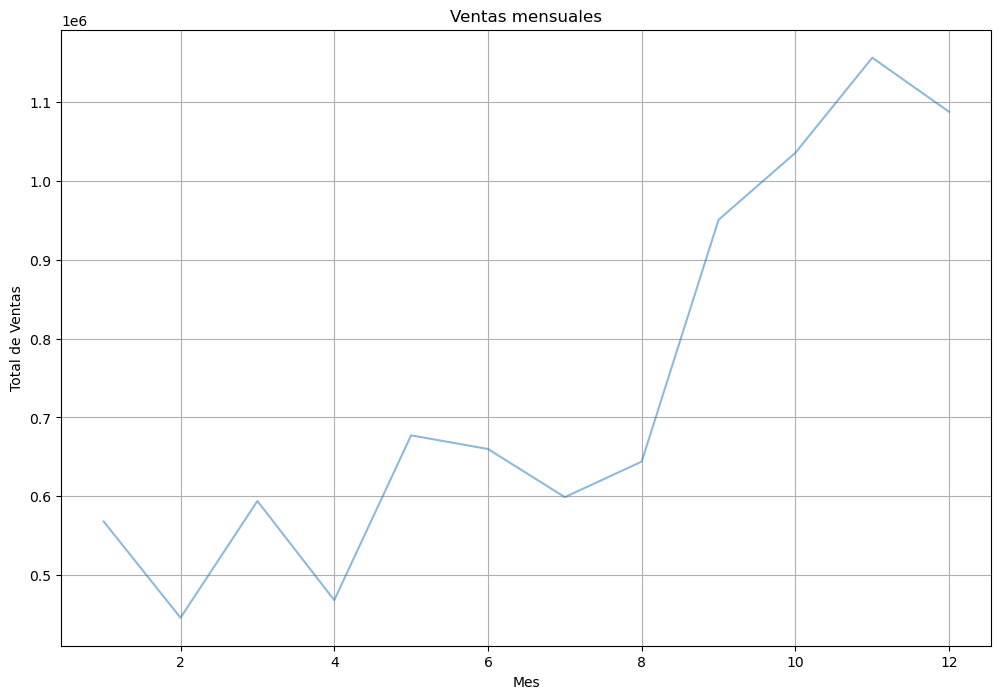

In [53]:
plt.figure(figsize=(12, 8))
plt.plot(ventas_por_mes['Mes'], ventas_por_mes['Monto Total de Ventas'], alpha=0.5, )
plt.title('Ventas mensuales')
plt.xlabel('Mes')
plt.ylabel('Total de Ventas')
plt.grid(True)
plt.xticks(rotation = 0)
plt.show()

Vemos que las ventas generales mantienen la tendencia del número de facturas, siendo noviembre el mes de mejores ingresos, bajando en el primer trimestre del año, y repuntando ventas a partir del mes de agsoto. 

### Analisis de Clientes que mas han gastado

In [54]:
# Calcular el total gastado por cada cliente
total_gastado_por_cliente = data_filtered2.groupby('customer_id')['amount'].sum().reset_index()

# Ordenar los clientes por el monto total gastado de mayor a menor
clientes_mas_gastadores = total_gastado_por_cliente.sort_values(by='amount', ascending=False)

# Mostrar los 10 clientes que más han gastado
print("Clientes que más han gastado:")
clientes_mas_gastadores.sample(10)

Clientes que más han gastado:


customer_id   amount
2900      16303.0  5360.63
1623      14549.0   289.24
3881      17658.0   595.42
1910      14960.0   221.27
2731      16071.0   326.24
1179      13941.0  5112.96
2424      15645.0   612.01
1652      14591.0  1320.21
2463      15695.0   409.98
1888      14923.0   749.10

In [55]:
top_clients = clientes_mas_gastadores.head(10)
top_clients

customer_id     amount
1690      14646.0  280206.02
4202      18102.0  259657.30
3729      17450.0  194390.79
3009      16446.0  168472.50
1880      14911.0  143711.17
55        12415.0  124914.53
1334      14156.0  117210.08
3772      17511.0   91062.38
2703      16029.0   80850.84
0         12346.0   77183.60

In [56]:
#Analizamos perfil de cada clinte 
cliente = top_clients['customer_id'].tolist()
cliente

[14646.0,
 18102.0,
 17450.0,
 16446.0,
 14911.0,
 12415.0,
 14156.0,
 17511.0,
 16029.0,
 12346.0]

In [57]:
datos_clientes_top = (data_filtered2.query(f'customer_id in {cliente}'))
datos_clientes_top

invoice_no stock_code                     description  quantity  \
177        536386     85099B         JUMBO BAG RED RETROSPOT       100   
176        536386     85099C  JUMBO  BAG BAROQUE BLACK WHITE       100   
175        536386      84880           WHITE WIRE EGG HOLDER        36   
178        536387      79321                   CHILLI LIGHTS       192   
179        536387      22780  LIGHT GARLAND BUTTERFILES PINK       192   
...           ...        ...                             ...       ...   
540060     581457      22189         CREAM HEART CARD HOLDER       324   
540059     581457      22188         BLACK HEART CARD HOLDER       324   
540063     581457      23553     LANDMARK FRAME CAMDEN TOWN        120   
540421     581483      23843      PAPER CRAFT  LITTLE BIRDIE     80995   
541702     581566      23404      HOME SWEET HOME BLACKBOARD       144   

              invoice_date  unit_price  customer_id          region  \
177    2019-12-01 09:57:00        1.65      16029.0  United Kingdom   
176    2019-12-01 09:57:00        1.65      16029.0  United Kingdom   
175    2019-12-01 09:57:00        4.95      16029.0  United Kingdom   
178    2019-12-01 09:58:00        3.82      16029.0  United Kingdom   
179    2019-12-01 09:58:00        3.37      16029.0  United Kingdom   
...                    ...         ...          ...             ...   
540060 2020-12-08 18:43:00        3.39      18102.0  United Kingdom   
540059 2020-12-08 18:43:00        2.31      18102.0  United Kingdom   
540063 2020-12-08 18:43:00       10.95      18102.0  United Kingdom   
540421 2020-12-09 09:15:00        2.08      16446.0  United Kingdom   
541702 2020-12-09 11:50:00        3.26      18102.0  United Kingdom   

           amount  Month  
177        165.00     12  
176        165.00     12  
175        178.20     12  
178        733.44     12  
179        647.04     12  
...           ...    ...  
540060    1098.36     12  
540059     748.44     12  
540063    1314.00     12  
540421  168469.60     12  
541702     469.44     12  

[11838 rows x 10 columns]

In [58]:
datos_clientes_top['region'].unique()

['United Kingdom', 'EIRE', 'Netherlands', 'Australia']
Categories (38, object): ['Australia', 'Austria', 'Bahrain', 'Belgium', ..., 'USA', 'United Arab Emirates', 'United Kingdom', 'Other']

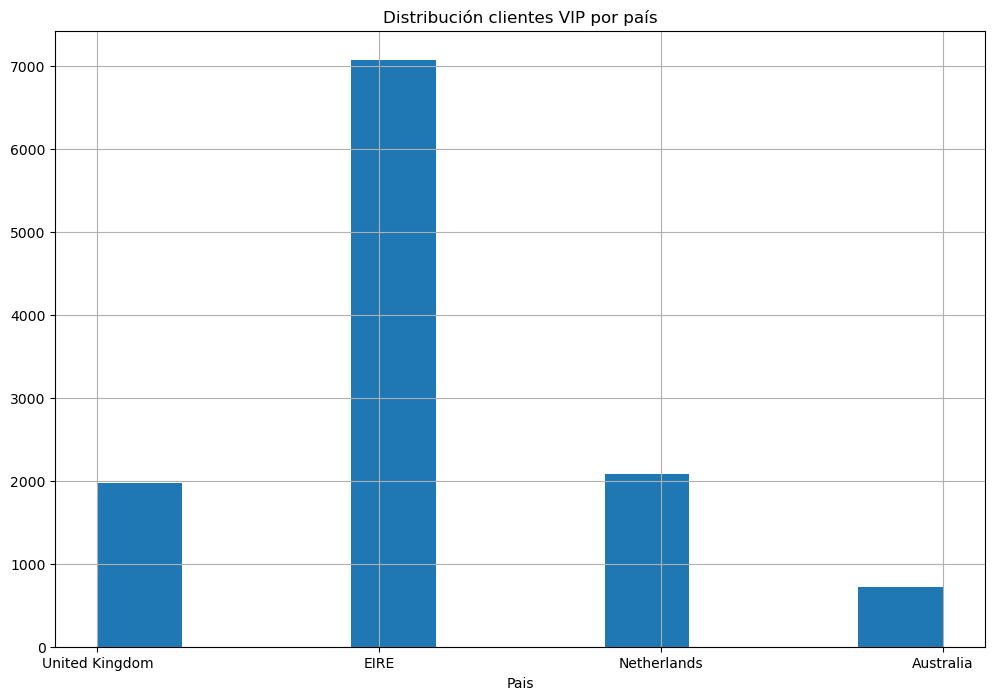

In [59]:
#Vemos de que país son dichos clientes 
plt.figure(figsize=(12, 8))
plt.hist(datos_clientes_top['region'])
plt.title('Distribución clientes VIP por país')
plt.xlabel('Pais')
plt.grid(True)
plt.xticks(rotation = 0)
plt.show()

Como sabeso que la mayoría de las compras provienen de Reino Unido e igualmente la mayoría de clientes son de este país, el hallazgo más revelador es que la región con clientes que gastan más es EIRE, que esta precisamente en los primeros luagres de ventas por deabjo de Reino Unido, pero muy por debajo del ranking de clientes, siendo el mismo caso para Australia que muestra ser un mercado potencial al generar ingresos y con clientes que realizan grandes cantidades de compras.

In [60]:
ventas_top = datos_clientes_top.groupby('Month')['amount'].sum().reset_index()
ventas_top.columns = ['Mes','Monto Total de Ventas']


In [61]:
ventas_top

Mes  Monto Total de Ventas
0     1              157279.18
1     2               69451.38
2     3               89521.52
3     4               19961.26
4     5              110847.11
5     6              124301.75
6     7               84053.59
7     8              114828.38
8     9              206962.30
9    10              167976.12
10   11              118533.75
11   12              273942.87

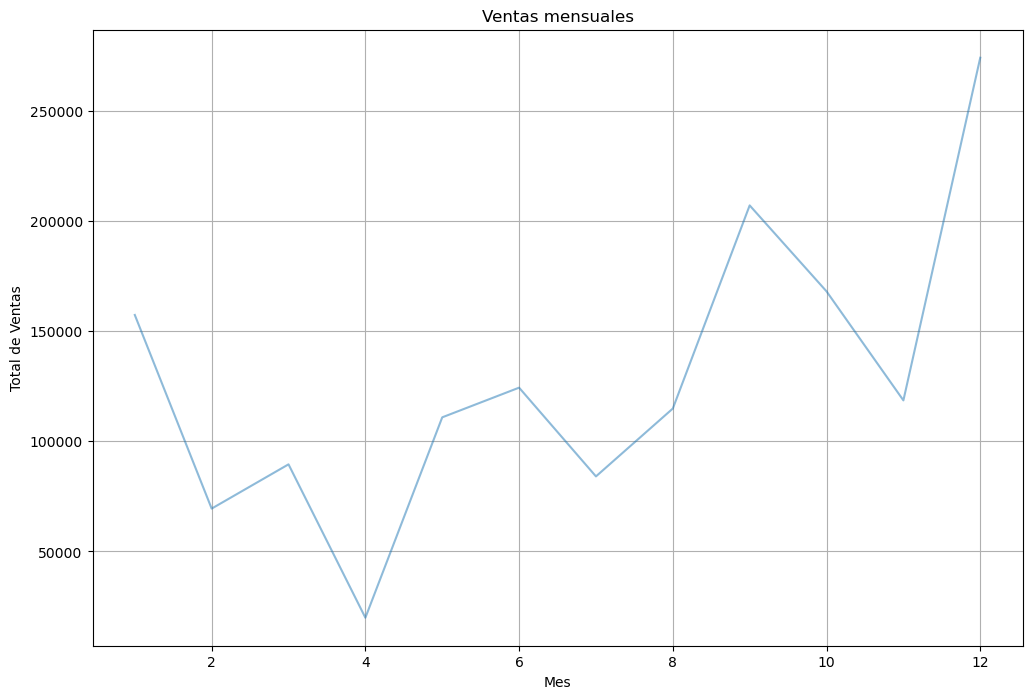

In [62]:
#Observamos en que fechas gastan más estos clientes 
plt.figure(figsize=(12, 8))
plt.plot(ventas_top['Mes'], ventas_top['Monto Total de Ventas'], alpha=0.5, )
plt.title('Ventas mensuales')
plt.xlabel('Mes')
plt.ylabel('Total de Ventas')
plt.grid(True)
plt.xticks(rotation = 0)
plt.show()

Observamos que a diferencia de la tendencia general los cleintes con pedidos más grandes tienen el pico máximo en diciembre decayendo un poco en enero y manteniendose a la baja alcnzando el punto mínimo en abril, recuperando gradualmente hasta septiembre donde decae en noviembre al contrario de la tendencia general que tenía en este mes el punto más alto.

### Analisis de clientes que mas compras han realizado

In [63]:
# Calcular el número de compras por cliente
compras_por_cliente = data_filtered2.groupby('customer_id')['invoice_no'].nunique().reset_index()

# Ordenar los clientes por el número de compras de mayor a menor
clientes_mas_compras = compras_por_cliente.sort_values(by='invoice_no', ascending=False)

# Mostrar los 10 clientes que más compras han realizado
print("Clientes que más compras han realizado:")
clientes_mas_compras.head(10)

Clientes que más compras han realizado:


customer_id  invoice_no
326       12748.0         210
1880      14911.0         201
4011      17841.0         124
562       13089.0          97
1662      14606.0          93
2177      15311.0          91
481       12971.0          86
1690      14646.0          74
2703      16029.0          63
796       13408.0          62

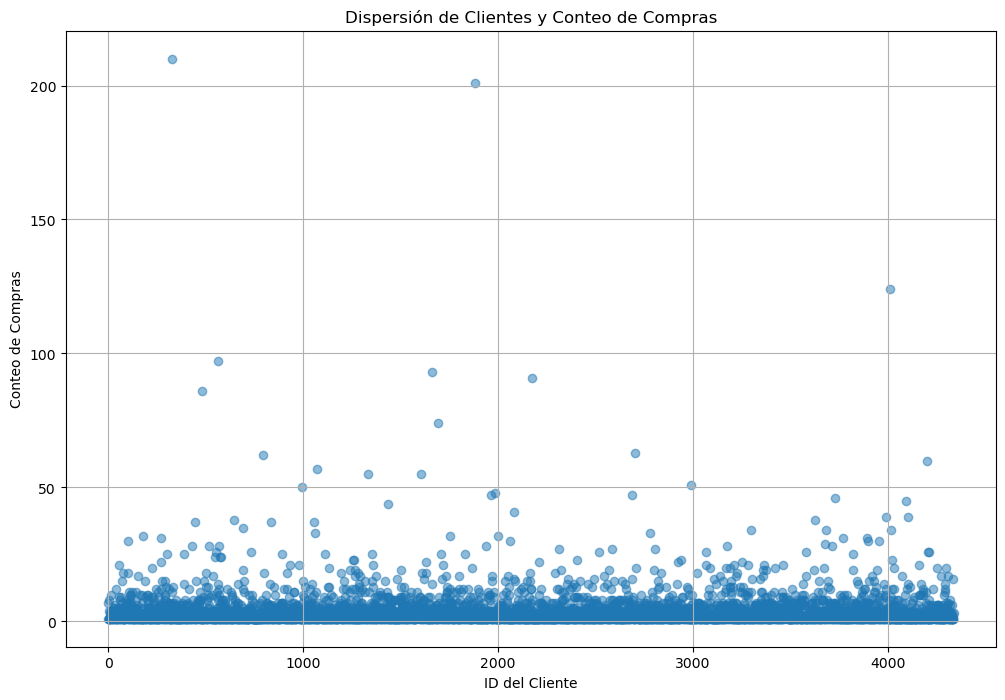

In [64]:
plt.figure(figsize=(12, 8))
plt.scatter(clientes_mas_compras.index, clientes_mas_compras['invoice_no'], alpha=0.5)
plt.title('Dispersión de Clientes y Conteo de Compras')
plt.xlabel('ID del Cliente')
plt.ylabel('Conteo de Compras')
plt.grid(True)
plt.show()


In [65]:
print(np.percentile(clientes_mas_compras['invoice_no'],[90,95,99]))

[ 9. 13. 30.]


No más del 1% de clientes tiene más de 30 compras y menos del 5% tiene más de 13 compras. Es decir que todos aquellos puntos que vemos en el gráfico por encima de 30 pedidos, son datos con anomalías. La mayoría de clientes, aproximadamente el 90%, tiene al menos 9 pedidos regsitrados.

### Analisis de comportamiento de clientes a lo largo del tiempo

In [66]:
# Agregamos columnas de fecha para facilitar el agrupamiento
data['date'] = data_filtered2['invoice_date'].dt.date

In [67]:
# Contar el número de compras por usuario
purchase_counts = data_filtered2.groupby('customer_id').size().reset_index(name='purchase_count')

# Calcular el número de usuarios con una única compra y con más de una compra
one_time_buyers = purchase_counts[purchase_counts['purchase_count'] == 1].shape[0]
repeat_buyers = purchase_counts[purchase_counts['purchase_count'] > 1].shape[0]
total_buyers = one_time_buyers + repeat_buyers

# Calcular el porcentaje de usuarios que no vuelven a comprar
percentage_one_time_buyers = (one_time_buyers / total_buyers) * 100

# Calcular el factor de stickiness
stickiness_factor = (repeat_buyers / total_buyers) * 100

# Resultados
print(f"Porcentaje de usuarios que no vuelven a comprar: {percentage_one_time_buyers:.2f}%")
print(f"Factor de stickiness: {stickiness_factor:.2f}%")

Porcentaje de usuarios que no vuelven a comprar: 1.66%
Factor de stickiness: 98.34%


In [68]:
#Obtenemos datos de fecha 
data_filtered2['invoice_month'] = data_filtered2['invoice_date'].dt.month
data_filtered2['invoice_week']  = data_filtered2['invoice_date'].dt.isocalendar().week
data_filtered2['invoice_day'] = data_filtered2['invoice_date'].dt.day
data_filtered2['invoice_year'] = data_filtered2['invoice_date'].dt.year

In [69]:
#Calculamos las tres métricas para conocer número de usuarios activos:
#DAU (usuarios activos diarios)
dau_total= data_filtered2.groupby('invoice_date').agg({'customer_id': 'nunique'}).mean()
#WAU (usuarios activos semanales)
wau_total = data_filtered2.groupby(['invoice_year', 'invoice_week']).agg({'customer_id': 'nunique'}).mean()
#MAU (usuarios activos mensuales)
mau_total = data_filtered2.groupby(['invoice_year', 'invoice_month']).agg({'customer_id': 'nunique'}).mean()

print(int(dau_total) , ' usuarios compran reguralemnte cada día.')
print(int(wau_total) , ' usuarios compran reguralemnte cada semana.')
print(int(mau_total) , ' personas usan el servicio cada mes.')

1  usuarios compran reguralemnte cada día.
288  usuarios compran reguralemnte cada semana.
1004  personas usan el servicio cada mes.


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15864\3299674560.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(int(dau_total) , ' usuarios compran reguralemnte cada día.')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15864\3299674560.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(int(wau_total) , ' usuarios compran reguralemnte cada semana.')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15864\3299674560.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(int(mau_total) , ' personas usan el servicio cada mes.')


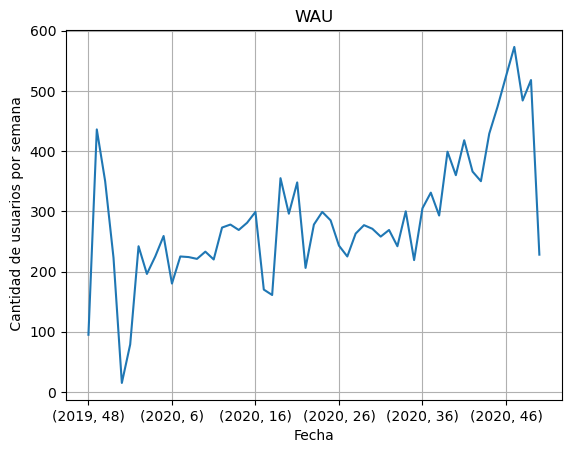

In [70]:
wau_graph = data_filtered2.groupby(['invoice_year', 'invoice_week']).agg({'customer_id': 'nunique'})
wau_graph.plot( title= 'WAU', 
                 xlabel = 'Fecha',
                 ylabel = ' Cantidad de usuarios por semana', 
                 legend = False, 
                 grid = True)
plt.show()

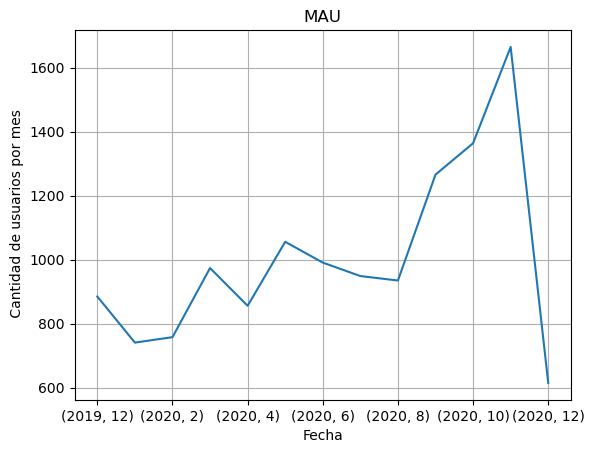

In [71]:
mau_graph = data_filtered2.groupby(['invoice_year', 'invoice_month']).agg({'customer_id': 'nunique'})
mau_graph.plot( title= 'MAU', 
                 xlabel = 'Fecha',
                 ylabel = ' Cantidad de usuarios por mes', 
                 legend = False, 
                 grid = True)
plt.show()

Observamos que semanalmente y mensualmente la mayoría de los clientes regresa, teniendo el punto más álgido en noviembre y bajando en el mes de diciembre, obteneniendo cierta estabilidad a partir del segundo trimestre del año, siendo que en agosto comienzan a subir los ingresos. 
Otro análsis interesante sería comprar estas tendencias con la de clientes top, pero se requeriría de un análsis más detallado.

### Analisis de comportamiento de clientes a lo largo del tiempo

In [72]:
# Agregamos columnas de fecha para facilitar el agrupamiento
data_filtered2['date'] = data['invoice_date'].dt.date
data_filtered2['month'] = data_filtered2['invoice_date'].dt.to_period('M').dt.to_timestamp()
data_filtered2['week'] = data_filtered2['invoice_date'].dt.to_period('W-SUN').dt.to_timestamp()  # Comienza la semana el domingo

In [73]:
data_filtered2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   invoice_no     392732 non-null  object        
 1   stock_code     392732 non-null  object        
 2   description    392732 non-null  category      
 3   quantity       392732 non-null  int64         
 4   invoice_date   392732 non-null  datetime64[ns]
 5   unit_price     392732 non-null  float64       
 6   customer_id    392732 non-null  float64       
 7   region         392732 non-null  category      
 8   amount         392732 non-null  float64       
 9   Month          392732 non-null  int32         
 10  invoice_month  392732 non-null  int32         
 11  invoice_week   392732 non-null  UInt32        
 12  invoice_day    392732 non-null  int32         
 13  invoice_year   392732 non-null  int32         
 14  date           392732 non-null  object        
 15  month

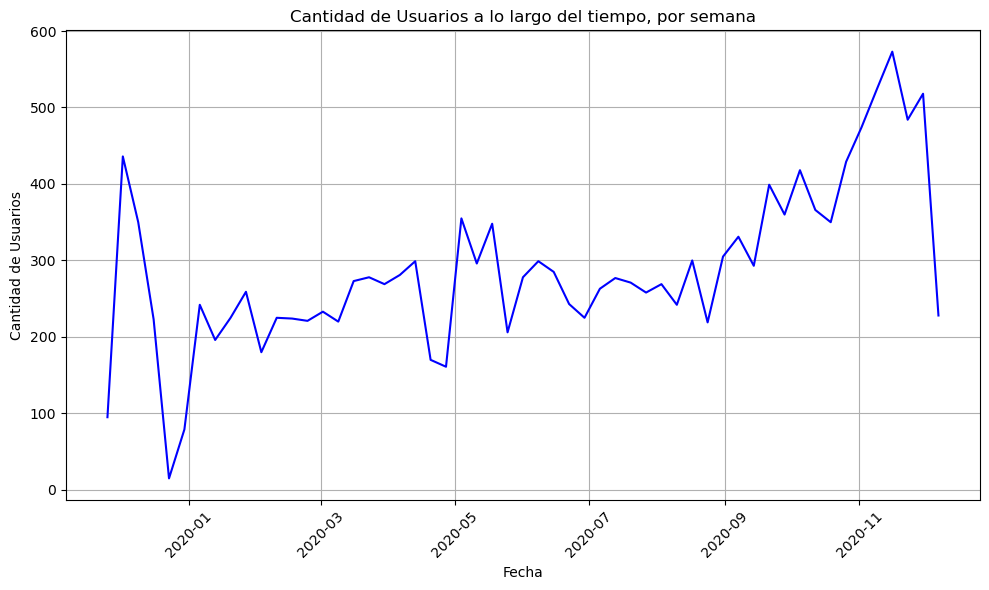

In [74]:
users_per_week = data_filtered2.groupby('week')['customer_id'].nunique()
#Trazamos el gráfico

# Gráfico de línea de usuarios únicos por semana
plt.figure(figsize=(10, 6))
plt.plot(users_per_week, linestyle='-', color='b')
plt.title('Cantidad de Usuarios a lo largo del tiempo, por semana')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Usuarios')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

El comportamiento es muy fluctuante, con tendencia a incrementar para finales de año, como bien sabemos, es la temporada en el que la gente modifica su comportamiento de compras

### Analisis de comportamiento de facturas a lo largo del tiempo

In [75]:
# Pedidos únicos por día
invoices_per_day = data_filtered2.groupby('date')['invoice_no'].nunique()

#Obtenemos las medias(promedios) para cada unidad de medida de tiempo

print('Promedio de facturas únicas por día:', invoices_per_day.mean())

Promedio de facturas únicas por día: 60.773770491803276


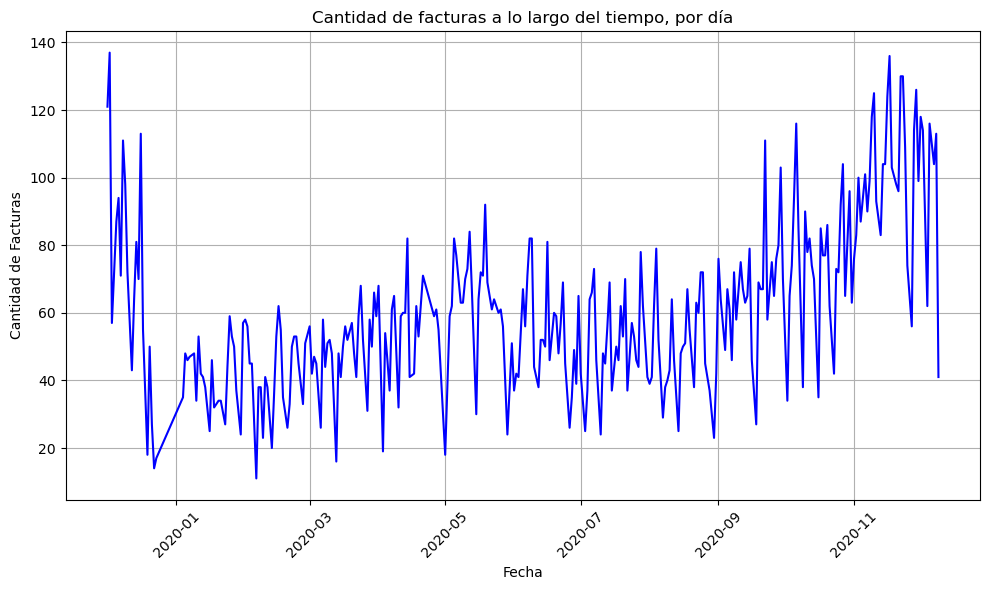

In [76]:
#Trazamos el gráfico

# Gráfico de línea de facturas únicas por día (compras)
plt.figure(figsize=(10, 6))
plt.plot(invoices_per_day, linestyle='-', color='b')
plt.title('Cantidad de facturas a lo largo del tiempo, por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Facturas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Nuevamente observamos el comportamiento alcista a finales e inicios de año.
Vemos que cada semana hay alzas y bajas por lo que para futuros análisis se  recomienda obtener patrones que identifiquen que factores influyen en los picos de ventas, como por ejemplo promociones o campañas de marketing.

### Análisis número de facturas por prodcuto

In [77]:
# Conteo de facturas por producto (description)
facturas_por_producto = data_filtered2.groupby('description')['invoice_no'].nunique().reset_index()
facturas_por_producto.columns = ['Producto', 'Numero de Facturas']
facturas_por_producto = facturas_por_producto.sort_values('Numero de Facturas', ascending = False)
#mostramos 10 primeras filas para obtener los 10 prodcutos más populares
facturas_por_producto.head(20)

Producto  Numero de Facturas
3911  WHITE HANGING HEART T-LIGHT HOLDER                1971
2911            REGENCY CAKESTAND 3 TIER                1704
1863             JUMBO BAG RED RETROSPOT                1600
2467                       PARTY BUNTING                1380
244        ASSORTED COLOUR BIRD ORNAMENT                1375
2050             LUNCH BAG RED RETROSPOT                1288
3191   SET OF 3 CAKE TINS PANTRY DESIGN                 1146
2749                             POSTAGE                1099
2042             LUNCH BAG  BLACK SKULL.                1052
2391     PACK OF 72 RETROSPOT CAKE CASES                1029
3520                      SPOTTY BUNTING                1003
2053          LUNCH BAG SPACEBOY DESIGN                  988
2435     PAPER CHAIN KIT 50'S CHRISTMAS                  980
2249     NATURAL SLATE HEART CHALKBOARD                  967
2045                 LUNCH BAG CARS BLUE                 966
1707               HEART OF WICKER SMALL                 961
2049             LUNCH BAG PINK POLKADOT                 931
2055              LUNCH BAG SUKI DESIGN                  899
1830            JAM MAKING SET WITH JARS                 879
165            ALARM CLOCK BAKELIKE RED                  877

Observamos que las categorias principales son las siguientes: 
- LIGHT HOLDER 
- BAG
- PARTY BUNTING	
- ORNAMENT
- CAKE TINS
- POSTAGE	

In [78]:
#Filtramos el DF con la lista de las catgorias 
#Creamos una nueva lista 
categorias_populares = ['LIGHT HOLDER','BAG','PARTY BUNTING', 'ORNAMENT', 'CAKE TINS','POSTAGE']
#Filtramos
df_categorias = data_filtered2[data_filtered2.description.str.contains('|'.join(categorias_populares))]

df_categorias

invoice_no stock_code                         description  quantity  \
0          536365     85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
6          536365      21730   GLASS STAR FROSTED T-LIGHT HOLDER         6   
9          536367      84879       ASSORTED COLOUR BIRD ORNAMENT        32   
38         536370      22661     CHARLOTTE BAG DOLLY GIRL DESIGN        20   
45         536370       POST                             POSTAGE         3   
...           ...        ...                                 ...       ...   
541888     581585      23145      ZINC T-LIGHT HOLDER STAR LARGE        12   
541872     581585      22460      EMBOSSED GLASS TEALIGHT HOLDER        12   
541875     581585      84879       ASSORTED COLOUR BIRD ORNAMENT        16   
541876     581585      84945  MULTI COLOUR SILVER T-LIGHT HOLDER        24   
541892     581586      21217       RED RETROSPOT ROUND CAKE TINS        24   

              invoice_date  unit_price  customer_id          region  amount  \
0      2019-12-01 08:26:00        2.55      17850.0  United Kingdom   15.30   
6      2019-12-01 08:26:00        4.25      17850.0  United Kingdom   25.50   
9      2019-12-01 08:34:00        1.69      13047.0  United Kingdom   54.08   
38     2019-12-01 08:45:00        0.85      12583.0          France   17.00   
45     2019-12-01 08:45:00       18.00      12583.0          France   54.00   
...                    ...         ...          ...             ...     ...   
541888 2020-12-09 12:31:00        0.95      15804.0  United Kingdom   11.40   
541872 2020-12-09 12:31:00        1.25      15804.0  United Kingdom   15.00   
541875 2020-12-09 12:31:00        1.69      15804.0  United Kingdom   27.04   
541876 2020-12-09 12:31:00        0.85      15804.0  United Kingdom   20.40   
541892 2020-12-09 12:49:00        8.95      13113.0  United Kingdom  214.80   

        Month  invoice_month  invoice_week  invoice_day  invoice_year  \
0          12             12            48            1          2019   
6          12             12            48            1          2019   
9          12             12            48            1          2019   
38         12             12            48            1          2019   
45         12             12            48            1          2019   
...       ...            ...           ...          ...           ...   
541888     12             12            50            9          2020   
541872     12             12            50            9          2020   
541875     12             12            50            9          2020   
541876     12             12            50            9          2020   
541892     12             12            50            9          2020   

              date      month       week  
0       2019-12-01 2019-12-01 2019-11-25  
6       2019-12-01 2019-12-01 2019-11-25  
9       2019-12-01 2019-12-01 2019-11-25  
38      2019-12-01 2019-12-01 2019-11-25  
45      2019-12-01 2019-12-01 2019-11-25  
...            ...        ...        ...  
541888  2020-12-09 2020-12-01 2020-12-07  
541872  2020-12-09 2020-12-01 2020-12-07  
541875  2020-12-09 2020-12-01 2020-12-07  
541876  2020-12-09 2020-12-01 2020-12-07  
541892  2020-12-09 2020-12-01 2020-12-07  

[53516 rows x 17 columns]

In [79]:
#Agregar coluamn categoria 
categorias = ['LIGHT HOLDER','BAG','PARTY BUNTING', 'ORNAMENT', 'CAKE TINS','POSTAGE']
#Filtramos
cond = [df_categorias['description'].str.contains(i,case=False) for i in categorias]
df_categorias['category'] =np.select(cond,categorias)
df_categorias

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15864\3883605879.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorias['category'] =np.select(cond,categorias)


invoice_no stock_code                         description  quantity  \
0          536365     85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
6          536365      21730   GLASS STAR FROSTED T-LIGHT HOLDER         6   
9          536367      84879       ASSORTED COLOUR BIRD ORNAMENT        32   
38         536370      22661     CHARLOTTE BAG DOLLY GIRL DESIGN        20   
45         536370       POST                             POSTAGE         3   
...           ...        ...                                 ...       ...   
541888     581585      23145      ZINC T-LIGHT HOLDER STAR LARGE        12   
541872     581585      22460      EMBOSSED GLASS TEALIGHT HOLDER        12   
541875     581585      84879       ASSORTED COLOUR BIRD ORNAMENT        16   
541876     581585      84945  MULTI COLOUR SILVER T-LIGHT HOLDER        24   
541892     581586      21217       RED RETROSPOT ROUND CAKE TINS        24   

              invoice_date  unit_price  customer_id          region  amount  \
0      2019-12-01 08:26:00        2.55      17850.0  United Kingdom   15.30   
6      2019-12-01 08:26:00        4.25      17850.0  United Kingdom   25.50   
9      2019-12-01 08:34:00        1.69      13047.0  United Kingdom   54.08   
38     2019-12-01 08:45:00        0.85      12583.0          France   17.00   
45     2019-12-01 08:45:00       18.00      12583.0          France   54.00   
...                    ...         ...          ...             ...     ...   
541888 2020-12-09 12:31:00        0.95      15804.0  United Kingdom   11.40   
541872 2020-12-09 12:31:00        1.25      15804.0  United Kingdom   15.00   
541875 2020-12-09 12:31:00        1.69      15804.0  United Kingdom   27.04   
541876 2020-12-09 12:31:00        0.85      15804.0  United Kingdom   20.40   
541892 2020-12-09 12:49:00        8.95      13113.0  United Kingdom  214.80   

        Month  invoice_month  invoice_week  invoice_day  invoice_year  \
0          12             12            48            1          2019   
6          12             12            48            1          2019   
9          12             12            48            1          2019   
38         12             12            48            1          2019   
45         12             12            48            1          2019   
...       ...            ...           ...          ...           ...   
541888     12             12            50            9          2020   
541872     12             12            50            9          2020   
541875     12             12            50            9          2020   
541876     12             12            50            9          2020   
541892     12             12            50            9          2020   

              date      month       week      category  
0       2019-12-01 2019-12-01 2019-11-25  LIGHT HOLDER  
6       2019-12-01 2019-12-01 2019-11-25  LIGHT HOLDER  
9       2019-12-01 2019-12-01 2019-11-25      ORNAMENT  
38      2019-12-01 2019-12-01 2019-11-25           BAG  
45      2019-12-01 2019-12-01 2019-11-25       POSTAGE  
...            ...        ...        ...           ...  
541888  2020-12-09 2020-12-01 2020-12-07  LIGHT HOLDER  
541872  2020-12-09 2020-12-01 2020-12-07  LIGHT HOLDER  
541875  2020-12-09 2020-12-01 2020-12-07      ORNAMENT  
541876  2020-12-09 2020-12-01 2020-12-07  LIGHT HOLDER  
541892  2020-12-09 2020-12-01 2020-12-07     CAKE TINS  

[53516 rows x 18 columns]

### Análisis de ingresos por categoria 

In [80]:
# Conteo de facturas por país (region)
facturas_por_categoria = df_categorias.groupby('category')['invoice_no'].nunique().reset_index()
facturas_por_categoria.columns = ['Categoria', 'Numero de Facturas']
facturas_por_categoria

Categoria  Numero de Facturas
0            BAG                8122
1      CAKE TINS                2012
2   LIGHT HOLDER                4991
3       ORNAMENT                1375
4  PARTY BUNTING                1529
5        POSTAGE                1115

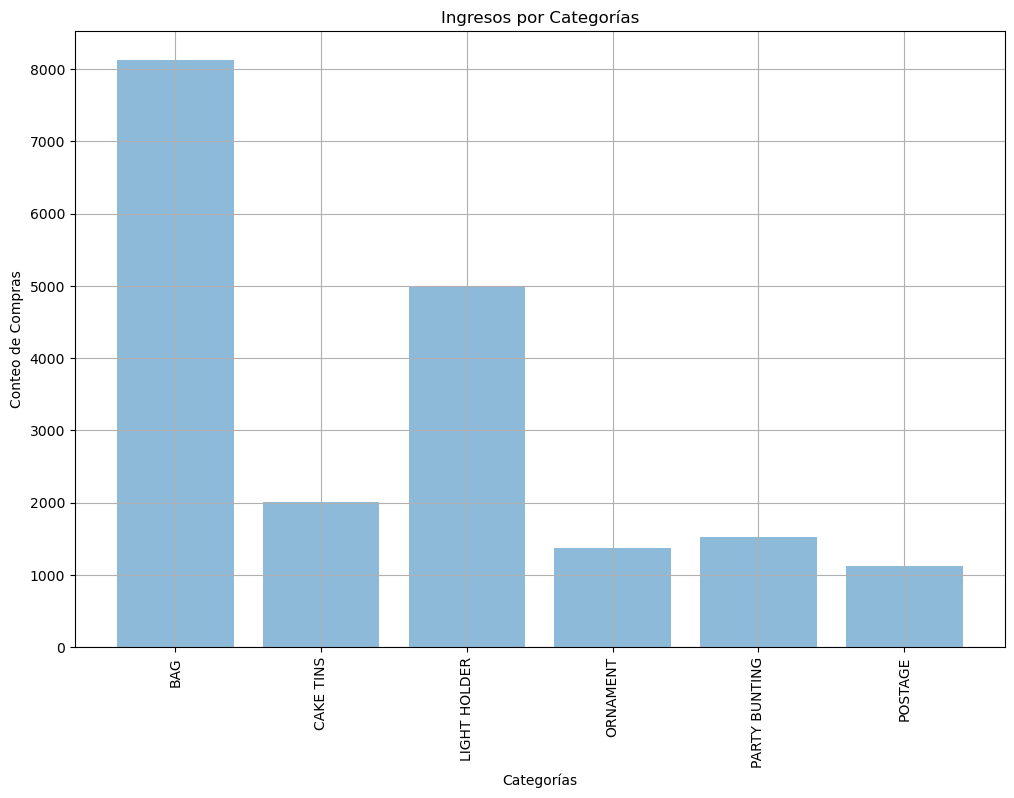

In [81]:
plt.figure(figsize=(12, 8))
plt.bar(facturas_por_categoria['Categoria'], facturas_por_categoria['Numero de Facturas'], alpha=0.5, )
plt.title('Ingresos por Categorías')
plt.xlabel('Categorías')
plt.ylabel('Conteo de Compras')
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

### Analisis de categorias a lo largo del tiempo 

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77) Text(0.5, 1.0, 'Ventas por categoria') Text(0.5, 0, 'Mes') Text(0, 0.5, 'Total de ventas')


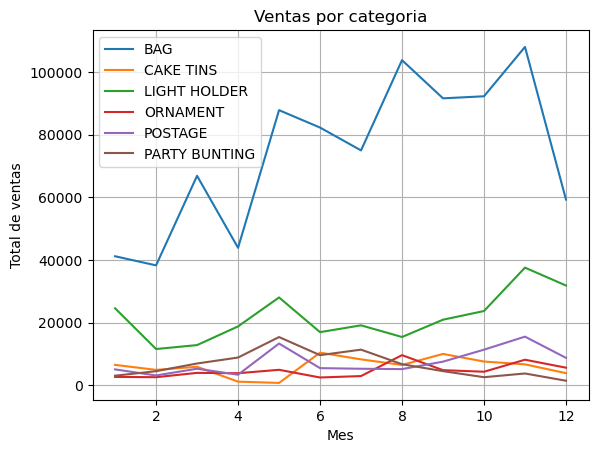

<Figure size 1500x2000 with 0 Axes>

In [82]:
#Hacemos los calculos para ingresos por categoria 
a = ['BAG']
filter= df_categorias[df_categorias['category'].isin(a)][['Month','amount']]
sales=filter.groupby('Month')['amount'].sum()
print(sales.plot(legend=True,label='BAG'))

a = ['CAKE TINS']
filter= df_categorias[df_categorias['category'].isin(a)][['Month','amount']]
sales=filter.groupby('Month')['amount'].sum()
print(sales.plot(legend=True,label='CAKE TINS'))

a = ['LIGHT HOLDER']
filter= df_categorias[df_categorias['category'].isin(a)][['Month','amount']]
sales=filter.groupby('Month')['amount'].sum()
print(sales.plot(legend=True,label='LIGHT HOLDER', grid=True))

a = ['ORNAMENT']
filter= df_categorias[df_categorias['category'].isin(a)][['Month','amount']]
sales=filter.groupby('Month')['amount'].sum()
print(sales.plot(legend=True,label='ORNAMENT', grid=True))

a = ['POSTAGE']
filter= df_categorias[df_categorias['category'].isin(a)][['Month','amount']]
sales=filter.groupby('Month')['amount'].sum()
print(sales.plot(legend=True,label='POSTAGE', grid=True))


a = ['PARTY BUNTING']
filter= df_categorias[df_categorias['category'].isin(a)][['Month','amount']]
sales=filter.groupby('Month')['amount'].sum()
print(sales.plot(legend=True,label='PARTY BUNTING', grid=True),
plt.title('Ventas por categoria'),
plt.xlabel('Mes'),
plt.ylabel('Total de ventas'))
plt.figure(figsize=(15,20))
plt.show()


Observamos que los prodcutos mas vendidos son bolsas, con tendencia a la alza durante el año, en Noviembre se realizan más compras en general de todos los productos, probablemente como compras para inicios de temporada decembrina,siendo que el diciembre bajan las ventas totales de los productos.

### Calculo de LTV 

Primero calcualamos el tamaño promedio de compra 

In [83]:
# Agrupar por invoice_no y sumar el amount para cada invoice
grouped_invoices = data_filtered2.groupby('invoice_no').agg({'amount': 'sum'})

# Calcular el tamaño promedio de compra
average_purchase_size = grouped_invoices['amount'].mean()

print(f'Tamaño promedio de compra: {average_purchase_size}')

Tamaño promedio de compra: 479.4566731765214


Ahora, calcularemos el LTV.

In [84]:
#Ahora recuperaremos el mes de la primera compra de cada cliente

# Identificar la primera compra de cada usuario
first_orders = data_filtered2.groupby('customer_id')['date'].min().reset_index()
first_orders.columns = ['customer_id', 'first_order']

# Extraer el mes y el año de la primera compra
first_orders['first_order'] = first_orders['first_order'].astype('datetime64[ns]')
first_orders['first_order_month'] = first_orders['first_order'].dt.to_period('M')

# Mostrar los primeros registros del DataFrame resultante
print(first_orders.head())

   customer_id first_order first_order_month
0      12346.0  2020-01-18           2020-01
1      12347.0  2019-12-07           2019-12
2      12348.0  2019-12-16           2019-12
3      12349.0  2020-11-21           2020-11
4      12350.0  2020-02-02           2020-02


In [85]:
#Calcularemos el número de nuevos clientes (n_buyers) para cada mes:

cohort_sizes = first_orders.groupby('first_order_month').agg({'customer_id': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

first_order_month  n_buyers
0           2019-12       885
1           2020-01       417
2           2020-02       380
3           2020-03       452
4           2020-04       300

In [86]:
#Creemos cohortes. Vamos a agregar los meses de la primera compra de los clientes a la tabla de facturas
data_complete = pd.merge(data_filtered2,first_orders, on='customer_id')
data_complete.sample(20)

invoice_no stock_code                          description  quantity  \
375643     574714      22964   3 PIECE SPACEBOY COOKIE CUTTER SET         2   
380761     574085      71477    COLOUR GLASS. STAR T-LIGHT HOLDER         6   
225259     580318      23561               SET OF 6 RIBBONS PARTY         6   
172292     547888      21790                   VINTAGE SNAP CARDS        12   
45678      540130     85123A   WHITE HANGING HEART T-LIGHT HOLDER       128   
210668     580032      21034         REX CASH+CARRY JUMBO SHOPPER         1   
340715     572068      23080             RED METAL BOX TOP SECRET         2   
34654      571158      21739       COSY SLIPPER SHOES SMALL GREEN         1   
128274     538419      21464  DISCO BALL ROTATOR BATTERY OPERATED         1   
195409     572073      22579   WOODEN TREE CHRISTMAS SCANDINAVIAN        20   
876        541429      21210   SET OF 72 RETROSPOT PAPER  DOILIES        12   
360375     568146      23199                     JUMBO BAG APPLES        10   
59081      537042      84580          MOUSE TOY WITH PINK T-SHIRT         1   
71669      563720      21672   WHITE SPOT RED CERAMIC DRAWER KNOB         2   
208256     544040      21181         PLEASE ONE PERSON METAL SIGN         1   
333588     575583      22156        HEART DECORATION WITH PEARLS          3   
275262     553130      22220     CAKE STAND LOVEBIRD 2 TIER WHITE         2   
347384     575607      21212      PACK OF 72 RETROSPOT CAKE CASES         3   
9277       581375      23554         LANDMARK FRAME OXFORD STREET         3   
326923     558769      21524       DOORMAT SPOTTY HOME SWEET HOME         1   

              invoice_date  unit_price  customer_id          region  amount  \
375643 2020-11-06 14:29:00        2.10      15427.0  United Kingdom    4.20   
380761 2020-11-02 17:30:00        3.95      17432.0  United Kingdom   23.70   
225259 2020-12-02 15:39:00        2.89      17686.0  United Kingdom   17.34   
172292 2020-03-28 09:59:00        0.85      13368.0  United Kingdom   10.20   
45678  2020-01-05 10:46:00        2.55      13798.0  United Kingdom  326.40   
210668 2020-12-01 12:17:00        0.95      14659.0  United Kingdom    0.95   
340715 2020-10-20 13:20:00        8.25      13159.0  United Kingdom   16.50   
34654  2020-10-14 10:25:00        2.95      14606.0  United Kingdom    2.95   
128274 2019-12-12 12:01:00        4.25      16367.0  United Kingdom    4.25   
195409 2020-10-20 13:46:00        0.29      13263.0  United Kingdom    5.80   
876    2020-01-18 09:44:00        1.45      14688.0  United Kingdom   17.40   
360375 2020-09-25 11:33:00        2.08      16169.0  United Kingdom   20.80   
59081  2019-12-05 10:45:00        3.75      13838.0  United Kingdom    3.75   
71669  2020-08-18 16:24:00        1.25      15867.0  United Kingdom    2.50   
208256 2020-02-15 11:40:00        2.10      14701.0  United Kingdom    2.10   
333588 2020-11-10 11:55:00        0.85      14456.0  United Kingdom    2.55   
275262 2020-05-13 12:41:00        9.95      17398.0  United Kingdom   19.90   
347384 2020-11-10 12:37:00        1.25      14096.0  United Kingdom    3.75   
9277   2020-12-08 12:36:00       12.50      16210.0  United Kingdom   37.50   
326923 2020-07-03 14:58:00        7.95      17899.0  United Kingdom    7.95   

        Month  invoice_month  invoice_week  invoice_day  invoice_year  \
375643     11             11            45            6          2020   
380761     11             11            45            2          2020   
225259     12             12            49            2          2020   
172292      3              3            13           28          2020   
45678       1              1             1            5          2020   
210668     12             12            49            1          2020   
340715     10             10            43           20          2020   
34654      10             10            42           14          2020   
128274     12             12  

In [87]:
#Ahora vamos a agrupar la tabla de pedidos por mes de la primera compra y totalizar los ingresos. 
cohorts = data_complete.groupby(['first_order_month','month']).agg({'amount': 'sum'}).reset_index()
cohorts.head()

first_order_month      month     amount
0           2019-12 2019-12-01  570422.73
1           2019-12 2020-01-01  275734.47
2           2019-12 2020-02-01  233390.47
3           2019-12 2020-03-01  302367.44
4           2019-12 2020-04-01  204034.38

In [88]:
#Agreguemos datos sobre cuántos usuarios realizaron sus primeras compras en cada mes 
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

first_order_month  n_buyers      month     amount
0           2019-12       885 2019-12-01  570422.73
1           2019-12       885 2020-01-01  275734.47
2           2019-12       885 2020-02-01  233390.47
3           2019-12       885 2020-03-01  302367.44
4           2019-12       885 2020-04-01  204034.38

In [89]:
#Calculamos la edad de la cohorte en lugar del mes del pedido
report['first_order_month'] = report['first_order_month'].dt.to_timestamp()
report['age'] = (
    report['month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head()

first_order_month  n_buyers      month     amount  age
0        2019-12-01       885 2019-12-01  570422.73    0
1        2019-12-01       885 2020-01-01  275734.47    1
2        2019-12-01       885 2020-02-01  233390.47    2
3        2019-12-01       885 2020-03-01  302367.44    3
4        2019-12-01       885 2020-04-01  204034.38    4

In [90]:
#Visualizaremos las cohortes como una tabla dinámica para aclarar las cosas

report['ltv']=report['amount'] / report['n_buyers']
output = report.pivot_table(index='first_order_month', columns='age', values='ltv')

output

age                        0           1           2           3           4   \
first_order_month                                                               
2019-12-01         644.545458  311.564373  263.718045  341.658124  230.547322   
2020-01-01         701.119520  131.879760  151.455659  171.525396  194.220072   
2020-02-01         415.001553   76.151684  107.801237  126.724711  105.497816   
2020-03-01         441.636438   66.460929  130.438960   94.555487  113.700088   
2020-04-01         406.030170   97.995300   83.428567   80.942633   87.510533   
2020-05-01         435.701761   65.639789   70.970880   67.472430   97.720493   
2020-06-01         559.565289   60.902851   58.282521  127.680000  110.206198   
2020-07-01         392.874473   62.711011   82.384947   92.510266  101.897979   
2020-08-01         471.012663  123.868402  209.813491  263.240533   90.440000   
2020-09-01         517.505321   95.990468  123.407860   41.135552         NaN   
2020-10-01         484.427905  110.869832   35.104134         NaN         NaN   
2020-11-01         417.072006   46.985617         NaN         NaN         NaN   
2020-12-01         658.669756         NaN         NaN         NaN         NaN   

age                        5           6           7           8           9   \
first_order_month                                                               
2019-12-01         379.789480  354.427299  350.626023  374.012508  533.098452   
2020-01-01         202.552926  168.041607  173.869113  172.351273  267.076019   
2020-02-01          89.883342  130.720289  163.928421  145.371947  170.233842   
2020-03-01          88.412235  143.416261  156.025708  156.742522   28.232522   
2020-04-01         100.344133   95.019667  113.365367   21.106667         NaN   
2020-05-01         115.758239  116.789930  630.930387         NaN         NaN   
2020-06-01         175.748306   33.649669         NaN         NaN         NaN   
2020-07-01          32.131383         NaN         NaN         NaN         NaN   
2020-08-01                NaN         NaN         NaN         NaN         NaN   
2020-09-01                NaN         NaN         NaN         NaN         NaN   
2020-10-01                NaN         NaN         NaN         NaN         NaN   
2020-11-01                NaN         NaN         NaN         NaN         NaN   
2020-12-01                NaN         NaN         NaN         NaN         NaN   

age                        10          11          12  
first_order_month                                      
2019-12-01         514.665424  578.916475  209.447424  
2020-01-01         295.570408   63.280647         NaN  
2020-02-01          27.895316         NaN         NaN  
2020-03-01                NaN         NaN         NaN  
2020-04-01                NaN         NaN         NaN  
2020-05-01                NaN         NaN         NaN  
2020-06-01                NaN         NaN         NaN  
2020-07-01                NaN         NaN         NaN  
2020-08-01                NaN         NaN         NaN  
2020-09-01                NaN         NaN         NaN  
2020-10-01                NaN         NaN         NaN  
2020-11-01                NaN         NaN         NaN  
2020-12-01                NaN         NaN         NaN

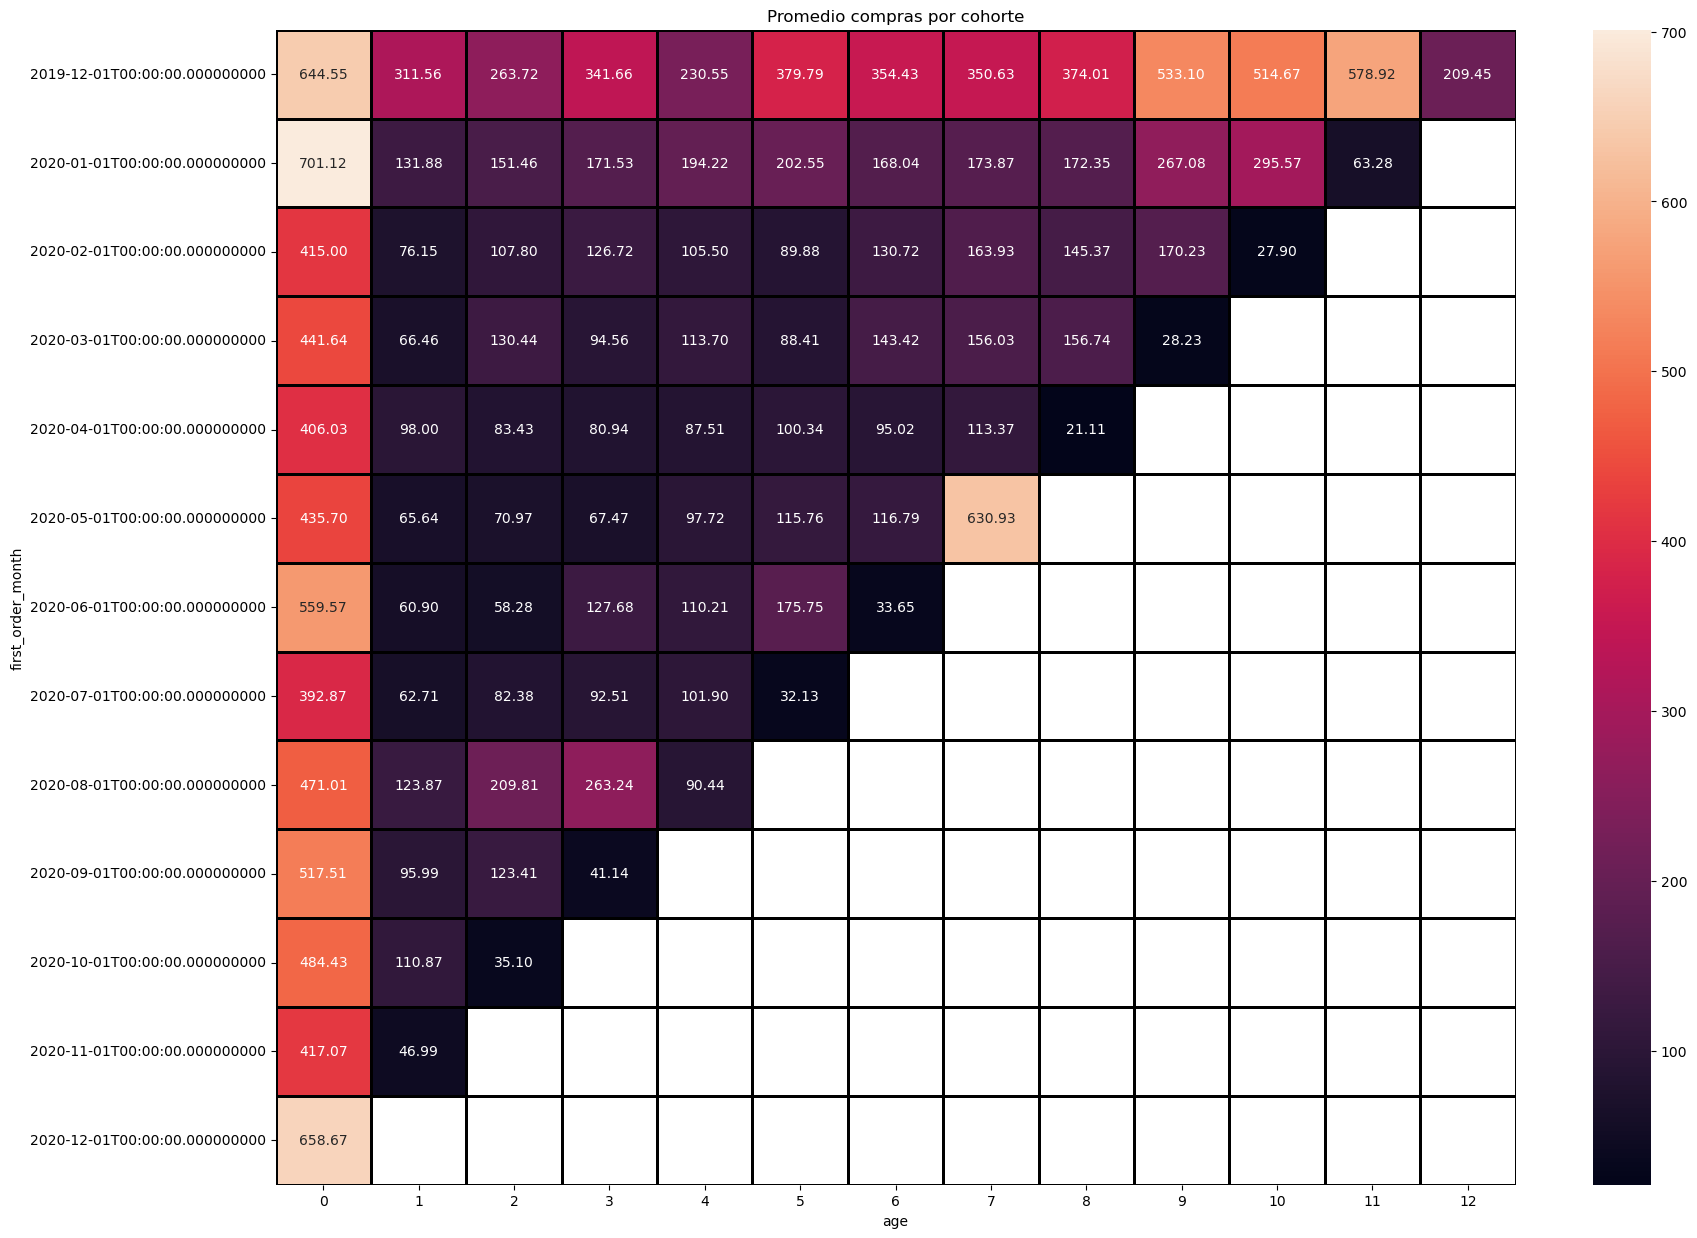

In [91]:
#Agregmos grafica heatmap para mejorar la visualizaición y evaluar el redimeinto de las cohortes y poder sacar conclusiones para cada mes
plt.figure(figsize=(20, 15))
plt.title('Promedio compras por cohorte')
sns.heatmap(
    output,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show()

In [92]:
# Transponer el DataFrame
output_transposed = output.T

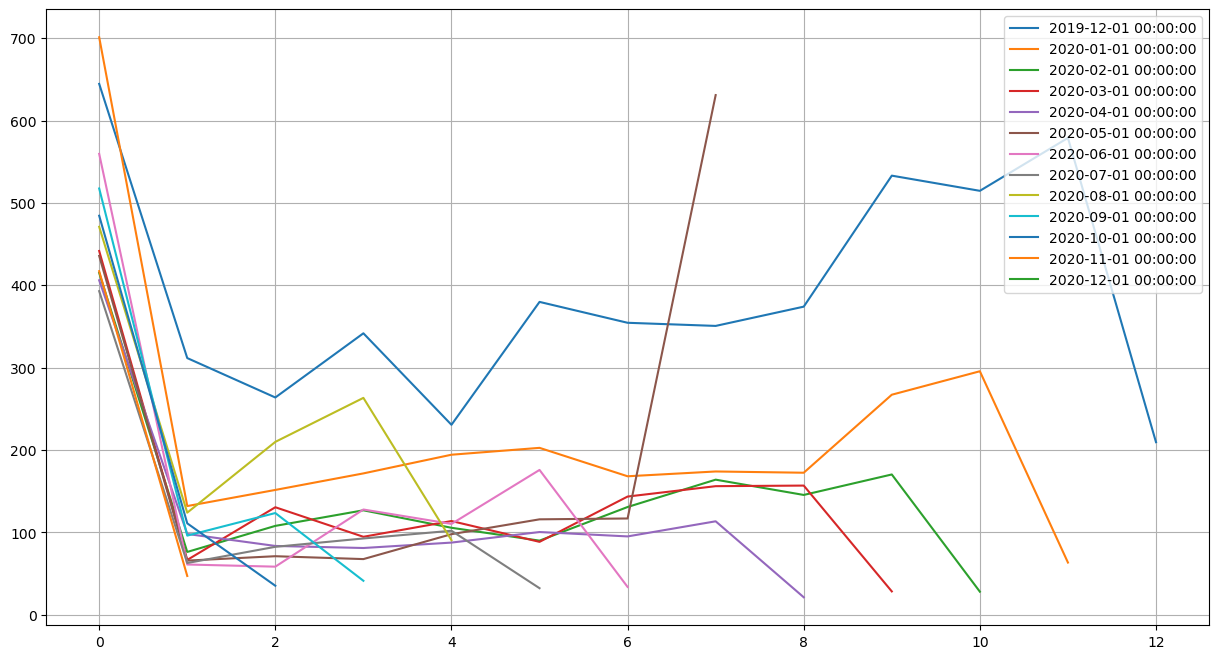

In [93]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(15, 8))

# Graficar cada columna como una línea
for column in output_transposed.columns:
    plt.plot(output_transposed.index, output_transposed[column], label=column)
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

Vemos que el primer mes es el que más ingresos trae, si bien la mayoría de clientes compran de manera recurrente, la primer compra es la más fuerte. 
La mayoría de clientes como vemos en el análsis de cohortes tardan aproximadamente una año en volver a realizar compras similares.  
Estos resultados se pueden apreciar más claramente en el  heatmap

Observando nuestra tabla pivote, nos damos cuenta que el primer mes en el que nuestros clientes realizan su primera compra, es en realidad, el mes más importante del cliclo de vida del cliente. Vemos que a partir del segundo mes, los ingresos por cliente fluctuan bastante, probablemente el periodo entre compras se vuelve más largo. Habrá que analizar los productos con mayor rotación.

### Análsis de cohortes con categorias más vendidas 

In [94]:
#Agrupamos los datos por de ususarios con que adquieren los prodcutos más vendidos obtenidos del df categories 
first_orders_product = df_categorias.groupby('customer_id')['date'].min().reset_index()
first_orders_product.columns = ['customer_id', 'first_order']

# Extraer el mes y el año de la primera compra
first_orders_product['first_order'] = first_orders_product['first_order'].astype('datetime64[ns]')
first_orders_product['first_order_month'] = first_orders_product['first_order'].dt.to_period('M')

# Mostrar los primeros registros del DataFrame resultante
print(first_orders_product.head())

   customer_id first_order first_order_month
0      12347.0  2019-12-07           2019-12
1      12348.0  2019-12-16           2019-12
2      12349.0  2020-11-21           2020-11
3      12350.0  2020-02-02           2020-02
4      12352.0  2020-03-01           2020-03


In [95]:
print(first_orders_product.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509 entries, 0 to 3508
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        3509 non-null   float64       
 1   first_order        3509 non-null   datetime64[ns]
 2   first_order_month  3509 non-null   period[M]     
dtypes: datetime64[ns](1), float64(1), period[M](1)
memory usage: 82.4 KB
None


In [96]:
#Calcularemos el número de usuarios para cada mes:

cohort_sizes_product = first_orders_product.groupby('first_order_month').agg({'customer_id': 'nunique'}).reset_index()
cohort_sizes_product.columns = ['first_order_month', 'n_users']
cohort_sizes_product

first_order_month  n_users
0            2019-12      611
1            2020-01      356
2            2020-02      289
3            2020-03      359
4            2020-04      236
5            2020-05      270
6            2020-06      219
7            2020-07      159
8            2020-08      141
9            2020-09      259
10           2020-10      275
11           2020-11      288
12           2020-12       47

In [97]:
#Creemos cohortes. Vamos a agregar los meses de la primera compra de los clientes a la tabla de facturas
data_complete_product = pd.merge(df_categorias,first_orders_product, on='customer_id')
data_complete_product.sample(10)

invoice_no stock_code                         description  quantity  \
42780     553017     85099B             JUMBO BAG RED RETROSPOT        10   
37980     548014      22720   SET OF 3 CAKE TINS PANTRY DESIGN          3   
1135      569766      23202              JUMBO BAG VINTAGE LEAF        10   
48790     564764        DOT                      DOTCOM POSTAGE         1   
15586     559542      20727             LUNCH BAG  BLACK SKULL.         1   
10285     575918      22460      EMBOSSED GLASS TEALIGHT HOLDER         4   
2870      572306      23203            JUMBO BAG VINTAGE DOILY          1   
8589      548367      20727             LUNCH BAG  BLACK SKULL.       100   
14925     549260     85123A  WHITE HANGING HEART T-LIGHT HOLDER         7   
42601     552843      47566                       PARTY BUNTING         1   

             invoice_date  unit_price  customer_id          region  amount  \
42780 2020-05-12 19:01:00        2.08      12757.0        Portugal   20.80   
37980 2020-03-29 11:29:00        4.95      17719.0  United Kingdom   14.85   
1135  2020-10-06 11:24:00        2.08      14849.0  United Kingdom   20.80   
48790 2020-08-30 10:49:00       11.17      14096.0  United Kingdom   11.17   
15586 2020-07-10 13:32:00        1.65      17126.0  United Kingdom    1.65   
10285 2020-11-11 16:58:00        1.25      17191.0  United Kingdom    5.00   
2870  2020-10-23 15:11:00        2.08      17841.0  United Kingdom    2.08   
8589  2020-03-30 15:51:00        1.45      17677.0  United Kingdom  145.00   
14925 2020-04-07 12:34:00        2.95      17790.0  United Kingdom   20.65   
42601 2020-05-11 14:37:00        4.95      14649.0  United Kingdom    4.95   

       Month  invoice_month  invoice_week  invoice_day  invoice_year  \
42780      5              5            20           12          2020   
37980      3              3            13           29          2020   
1135      10             10            41            6          2020   
48790      8              8            35           30          2020   
15586      7              7            28           10          2020   
10285     11             11            46           11          2020   
2870      10             10            43           23          2020   
8589       3              3            14           30          2020   
14925      4              4            15            7          2020   
42601      5              5            20           11          2020   

             date      month       week       category first_order  \
42780  2020-05-12 2020-05-01 2020-05-11            BAG  2020-05-12   
37980  2020-03-29 2020-03-01 2020-03-23      CAKE TINS  2020-03-29   
1135   2020-10-06 2020-10-01 2020-10-05            BAG  2019-12-01   
48790  2020-08-30 2020-08-01 2020-08-24        POSTAGE  2020-08-30   
15586  2020-07-10 2020-07-01 2020-07-06            BAG  2019-12-12   
10285  2020-11-11 2020-11-01 2020-11-09   LIGHT HOLDER  2019-12-06   
2870   2020-10-23 2020-10-01 2020-10-19            BAG  2019-12-01   
8589   2020-03-30 2020-03-01 2020-03-30            BAG  2019-12-06   
14925  2020-04-07 2020-04-01 2020-04-06   LIGHT HOLDER  2019-12-10   
42601  2020-05-11 2020-05-01 2020-05-11  PARTY BUNTING  2020-05-11   

      first_order_month  
42780           2020-05  
37980           2020-03  
1135            2019-12  
48790           2020-08  
15586           2019-12  
10285           2019-12  
2870            2019-12  
8589            2019-12  
14925           2019-12  
42601           2020-05

In [98]:
#Ahora vamos a agrupar la tabla de pedidos por mes de la primera compra y totalizar los ingresos. 
cohorts_product = data_complete_product.groupby(['first_order_month','month']).agg({'amount': 'sum'}).reset_index()
cohorts_product.head()

first_order_month      month    amount
0           2019-12 2019-12-01  63859.76
1           2019-12 2020-01-01  35857.40
2           2019-12 2020-02-01  29012.18
3           2019-12 2020-03-01  47291.49
4           2019-12 2020-04-01  32508.45

In [99]:
report_product = pd.merge(cohort_sizes_product, cohorts_product, on='first_order_month')
report_product.head()

first_order_month  n_users      month    amount
0           2019-12      611 2019-12-01  63859.76
1           2019-12      611 2020-01-01  35857.40
2           2019-12      611 2020-02-01  29012.18
3           2019-12      611 2020-03-01  47291.49
4           2019-12      611 2020-04-01  32508.45

In [100]:
#Calculamos la edad de la cohorte en lugar del mes del pedido
report_product['first_order_month'] = report_product['first_order_month'].dt.to_timestamp()
report_product['age'] = (
    report_product['month'] - report_product['first_order_month']
) / np.timedelta64(1, 'M')
report_product['age'] = report_product['age'].round().astype('int')
report_product

first_order_month  n_users      month    amount  age
0         2019-12-01      611 2019-12-01  63859.76    0
1         2019-12-01      611 2020-01-01  35857.40    1
2         2019-12-01      611 2020-02-01  29012.18    2
3         2019-12-01      611 2020-03-01  47291.49    3
4         2019-12-01      611 2020-04-01  32508.45    4
..               ...      ...        ...       ...  ...
86        2020-10-01      275 2020-11-01   3736.13    1
87        2020-10-01      275 2020-12-01    868.67    2
88        2020-11-01      288 2020-11-01  18642.88    0
89        2020-11-01      288 2020-12-01   4983.30    1
90        2020-12-01       47 2020-12-01   1912.92    0

[91 rows x 5 columns]

In [101]:
report_product['ltv']=report_product['amount'] / report['n_buyers']
output2 = report_product.pivot_table(index='first_order_month', columns='age', values='ltv')

output2

age                        0          1          2          3          4   \
first_order_month                                                           
2019-12-01          72.157921  40.516836  32.782124  53.436712  36.732712   
2020-01-01         113.658249  31.592854  50.689185  35.592518  53.966715   
2020-02-01          60.487158  14.864842  19.838895  37.027447  21.912211   
2020-03-01          61.734646  11.037345  23.856903  17.631372  23.146460   
2020-04-01          67.414700  24.683967  25.039900  27.190567  31.590467   
2020-05-01          86.808838  20.966831  22.894120  18.500634  21.297324   
2020-06-01          81.340620  22.657314  23.046033  23.922934  21.038347   
2020-07-01          68.375213  15.516383  12.431117  14.243936  16.450585   
2020-08-01         126.938107  16.164793  39.126982  78.739408  20.322604   
2020-09-01          81.715318   9.937793  16.296756   5.012508        NaN   
2020-10-01          52.896955  10.436117   2.426453        NaN        NaN   
2020-11-01          57.539753  15.380556        NaN        NaN        NaN   
2020-12-01          46.656585        NaN        NaN        NaN        NaN   

age                       5          6          7          8          9   \
first_order_month                                                          
2019-12-01         80.230610  63.726678  54.571559  65.602147  57.162802   
2020-01-01         51.652038  50.062854  56.743189  50.993765  46.422446   
2020-02-01         25.000105  31.808737  30.766816  32.023632  24.187605   
2020-03-01         19.577412  19.203252  34.162345  27.103319   4.741482   
2020-04-01         20.001700  12.947700  23.138933   1.920333        NaN   
2020-05-01         21.397641  23.255634   6.277711        NaN        NaN   
2020-06-01         28.374669   3.993843        NaN        NaN        NaN   
2020-07-01          4.796543        NaN        NaN        NaN        NaN   
2020-08-01               NaN        NaN        NaN        NaN        NaN   
2020-09-01               NaN        NaN        NaN        NaN        NaN   
2020-10-01               NaN        NaN        NaN        NaN        NaN   
2020-11-01               NaN        NaN        NaN        NaN        NaN   
2020-12-01               NaN        NaN        NaN        NaN        NaN   

age                       10         11         12  
first_order_month                                   
2019-12-01         55.067017  75.298271  20.039706  
2020-01-01         66.378825  17.572542        NaN  
2020-02-01          7.939053        NaN        NaN  
2020-03-01               NaN        NaN        NaN  
2020-04-01               NaN        NaN        NaN  
2020-05-01               NaN        NaN        NaN  
2020-06-01               NaN        NaN        NaN  
2020-07-01               NaN        NaN        NaN  
2020-08-01               NaN        NaN        NaN  
2020-09-01               NaN        NaN        NaN  
2020-10-01               NaN        NaN        NaN  
2020-11-01               NaN        NaN        NaN  
2020-12-01               NaN        NaN        NaN

In [102]:
output2.cumsum(axis=1).round(2).fillna('')

age                    0       1       2       3       4       5       6   \
first_order_month                                                           
2019-12-01          72.16  112.67  145.46  198.89  235.63  315.86  379.58   
2020-01-01         113.66  145.25  195.94  231.53   285.5  337.15  387.21   
2020-02-01          60.49   75.35   95.19  132.22  154.13  179.13  210.94   
2020-03-01          61.73   72.77   96.63  114.26  137.41  156.98  176.19   
2020-04-01          67.41    92.1  117.14  144.33  175.92  195.92  208.87   
2020-05-01          86.81  107.78  130.67  149.17  170.47  191.87  215.12   
2020-06-01          81.34   104.0  127.04  150.97  172.01  200.38  204.37   
2020-07-01          68.38   83.89   96.32  110.57  127.02  131.81           
2020-08-01         126.94   143.1  182.23  260.97  281.29                   
2020-09-01          81.72   91.65  107.95  112.96                           
2020-10-01          52.90   63.33   65.76                                   
2020-11-01          57.54   72.92                                           
2020-12-01          46.66                                                   

age                    7       8       9       10      11      12  
first_order_month                                                  
2019-12-01         434.16  499.76  556.92  611.99  687.29  707.33  
2020-01-01         443.96  494.95  541.37  607.75  625.33          
2020-02-01         241.71  273.73  297.92  305.86                  
2020-03-01         210.35  237.45  242.19                          
2020-04-01         232.01  233.93                                  
2020-05-01          221.4                                          
2020-06-01                                                         
2020-07-01                                                         
2020-08-01                                                         
2020-09-01                                                         
2020-10-01                                                         
2020-11-01                                                         
2020-12-01

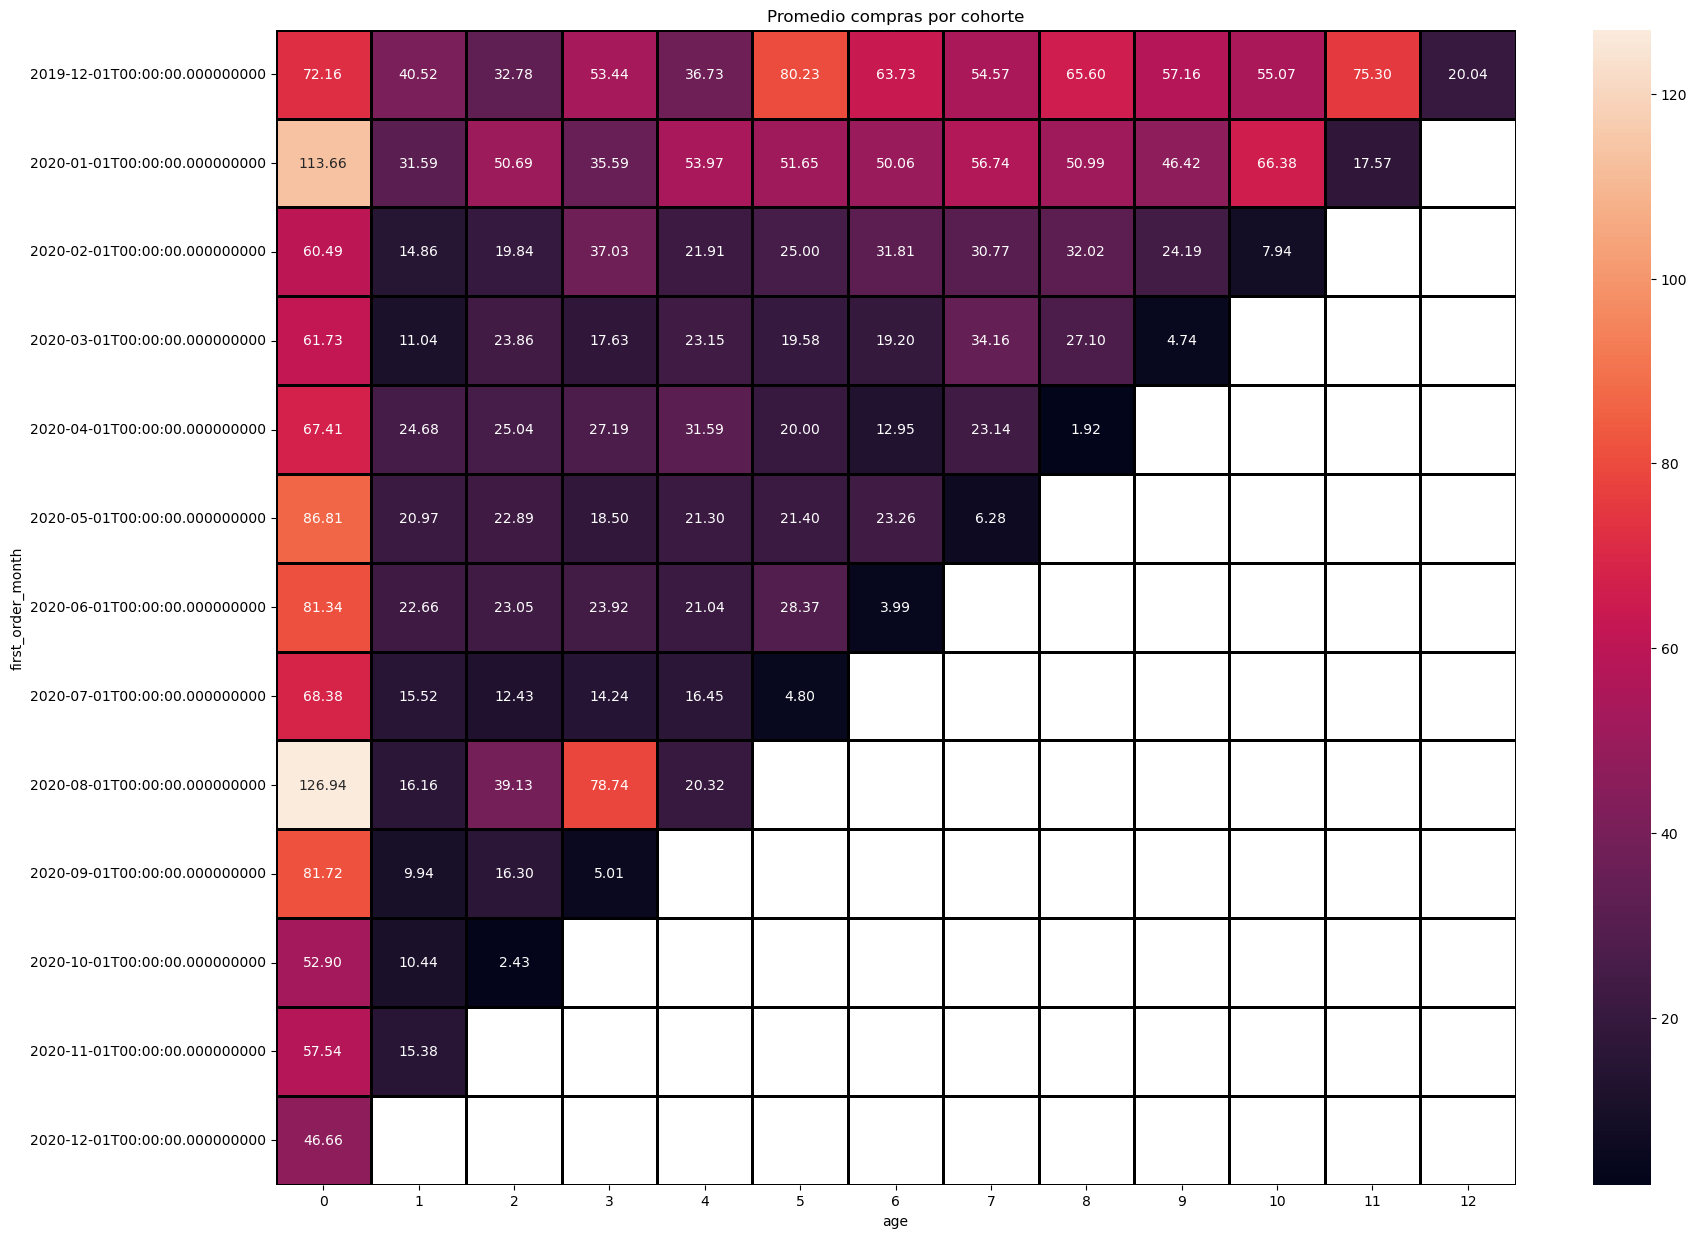

In [103]:
#Agregmos grafica heatmap para mejorar la visualizaición y evaluar el redimeinto de las cohortes y poder sacar conclusiones para cada mes
plt.figure(figsize=(20, 15))
plt.title('Promedio compras por cohorte')
sns.heatmap(
    output2,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show()

Filtrando los prodcutos que tienen mayor rotación, de acuerdo  a las categorias más venidas, vemos que a partir del segundo mes, los ingresos por cliente siguen fluctuando bastante, por lo que el comportamiento general de los clientes es igual que los clientes que compran los de las categorias más populares.
Valdría la pena explorar que tipo de campañas se realizan en los primero meses de los cohortes, o bien pensar en estratgias de retención ya que se observa que la hay ingresos al inicio, por lo que se piensa que existen campañas de promoción en primeras compras, sin emabrgo esto requiere de nuevos análsis y más datos.

### Segmentacion de datos

In [104]:
# Vamos a revisar la fecha más reciente en la columna 'invoice_date'
latest_date = data_filtered2['invoice_date'].max()

print(f"La fecha más reciente en los datos es: {latest_date}")

La fecha más reciente en los datos es: 2020-12-09 12:50:00


Se establece la fecha de análisis como el 9 de diciembre de 2020. Esta fecha se utiliza para calcular la métrica de recencia, que es la cantidad de días desde la última compra del cliente hasta esta fecha de análisis.

In [105]:
# Definir la fecha de análisis como la fecha más reciente en los datos
analysis_date = dt.datetime(2020, 12, 9)

# Preparar métricas RFM
rfm = data_filtered2.groupby('customer_id').agg({
    'quantity': lambda x: x.sum(),               # Sumar las cantidades compradas por cada cliente
    'amount': lambda x: x.sum(),                 # Sumar el monto gastado por cada cliente
    'invoice_no': 'count',                       # Contar el número de facturas por cliente (frecuencia de compra)
    'invoice_date': lambda x: (analysis_date - x.max()).days  # Calcular los días desde la última compra hasta la fecha de análisis (recencia)
})

Se agrupa el conjunto de datos data por customer_id y se agregan varias métricas para cada cliente:

quantity: Suma total de la cantidad de productos comprados.
amount: Suma total del monto gastado en todas las compras.
invoice_no: Conteo total de facturas, que representa la frecuencia de compras.
invoice_date: Se calcula la recencia para cada cliente como la cantidad de días desde la última compra hasta la fecha de análisis.

In [106]:
# Renombrar las columnas del DataFrame rfm
rfm.columns = ['quantity', 'monetary', 'frequency', 'recency']

# Filtrar los clientes que han comprado más de una vez
rfm = rfm[rfm['frequency'] > 1]

# Normalizar los datos RFM
rfm_data = rfm[['recency', 'frequency', 'monetary']]
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_data)

Se filtran los clientes para incluir solo aquellos que tienen al menos 2 compras (frecuencia > 1). Esto ayuda a enfocarse en clientes que no son solo compradores únicos.
Los datos de RFM (recencia, frecuencia, monetario) se normalizan utilizando StandardScaler de scikit-learn. La normalización es importante para asegurar que todas las variables tengan la misma escala y contribuyan de manera equitativa al modelo de clustering.

c:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

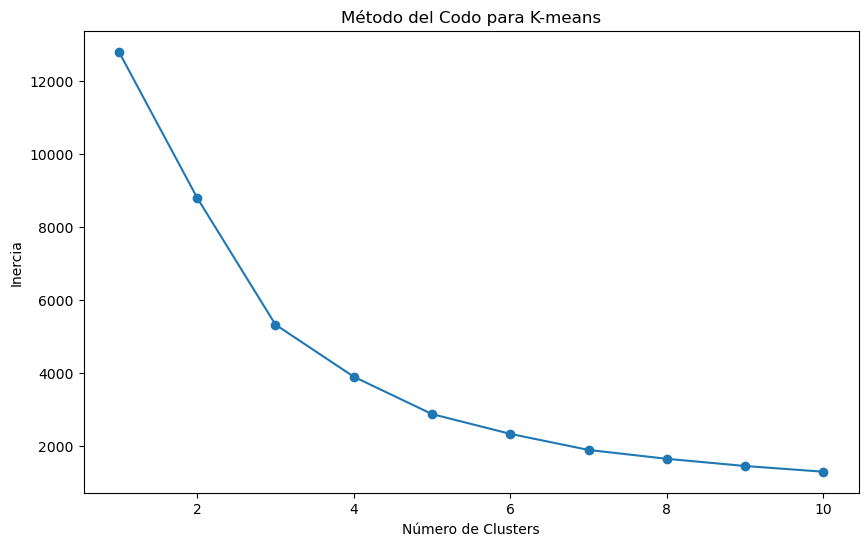

In [107]:
# Método del codo para determinar el número óptimo de clusters
range_n_clusters = range(1, 11)
inertia = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(rfm_normalized)
    inertia.append(kmeans.inertia_)
    
 # Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.show()   

Se utiliza el método del codo para determinar el número óptimo de clusters. Se prueba un rango de 1 a 10 clusters y se calcula la inercia (suma de las distancias cuadradas dentro de cada cluster) para cada valor de n_clusters.

In [108]:
# Crear una tabla para visualizar la inercia por número de clusters
inertia_table = pd.DataFrame({
    'Número de Clusters': range_n_clusters,
    'Inercia': inertia
})

inertia_table

Número de Clusters       Inercia
0                   1  12801.000000
1                   2   8797.872137
2                   3   5322.803241
3                   4   3895.012312
4                   5   2870.999191
5                   6   2328.727147
6                   7   1887.987210
7                   8   1645.118831
8                   9   1447.810646
9                  10   1291.120564

Se visualiza la inercia en función del número de clusters. El objetivo es identificar el "codo" en la curva, que indica el número óptimo de clusters donde la inercia comienza a disminuir más lentamente.

In [109]:
# El codo está en 3 clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
rfm['cluster'] = kmeans.fit_predict(rfm_normalized)

# Asignar nombres a los clusters
cluster_names = {
    0: 'Clientes Activos y Leales',
    1: 'Clientes en Riesgo',
    2: 'Clientes VIP'
}
rfm['cluster_name'] = rfm['cluster'].map(cluster_names)

# Resumen de los clusters
cluster_summary = rfm.groupby('cluster_name').agg({
    'recency': ['mean', 'count'],
    'frequency': ['mean', 'count'],
    'monetary': ['mean', 'count']
}).round(2)

cluster_summary.columns = ['Recencia Promedio', 'Recencia Conteo', 'Frecuencia Promedio', 'Frecuencia Conteo', 'Monetario Promedio', 'Monetario Conteo']
cluster_summary

c:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Recencia Promedio  Recencia Conteo  \
cluster_name                                                    
Clientes Activos y Leales              39.62             3217   
Clientes VIP                            3.00               13   
Clientes en Riesgo                    244.57             1037   

                           Frecuencia Promedio  Frecuencia Conteo  \
cluster_name                                                        
Clientes Activos y Leales               102.60               3217   
Clientes VIP                           2536.62                 13   
Clientes en Riesgo                       28.56               1037   

                           Monetario Promedio  Monetario Conteo  
cluster_name                                                     
Clientes Activos y Leales             2036.79              3217  
Clientes VIP                        125981.34                13  
Clientes en Riesgo                     577.76              1037

Se ajusta el modelo K-means con el número óptimo de clusters (en este caso, 3) y se asignan nombres descriptivos a cada cluster. Los nombres se asignan utilizando un diccionario donde las claves son los números de cluster y los valores son los nombres descriptivos.
Se genera un resumen de estadísticas para cada cluster, incluyendo la recencia promedio, frecuencia promedio, y el valor monetario promedio por compra. También se cuenta el número de clientes en cada cluster. Los resultados se redondean a 2 decimales para mayor claridad en la presentación.
Este proceso nos permite segmentar a los clientes en grupos distintos según su comportamiento de compra, lo que puede ser útil para estrategias de marketing y gestión de clientes.

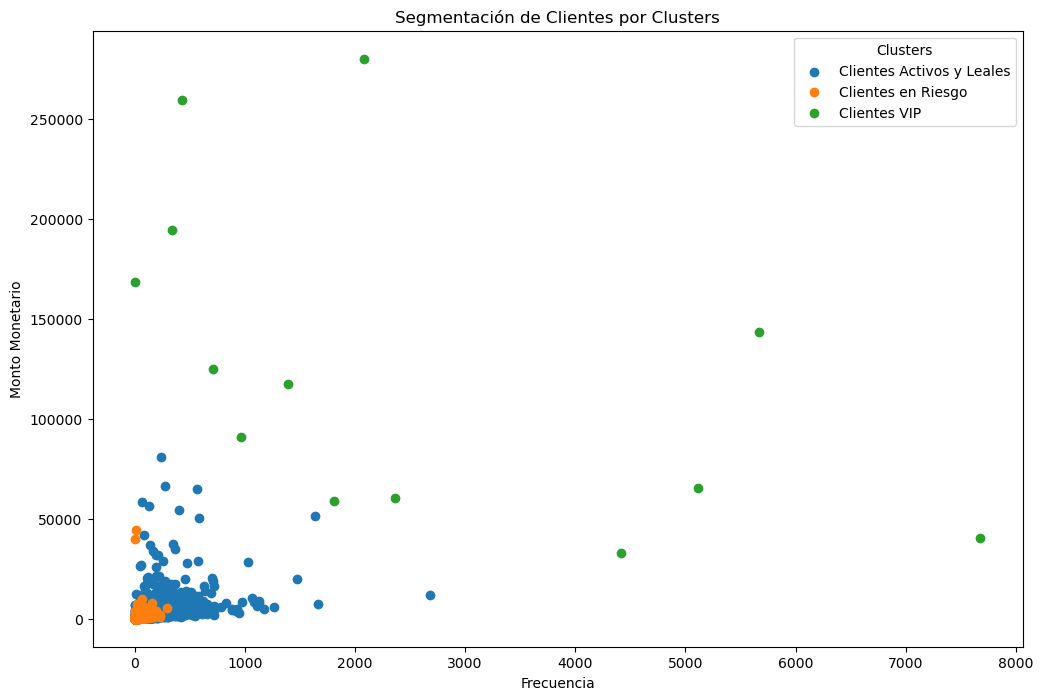

In [110]:
# Graficar los clusters 
plt.figure(figsize=(12, 8))
for cluster in range(optimal_clusters):
    plt.scatter(
        rfm[rfm['cluster'] == cluster]['frequency'],
        rfm[rfm['cluster'] == cluster]['monetary'],
        label=cluster_names[cluster] 
    )

plt.xlabel('Frecuencia')
plt.ylabel('Monto Monetario')
plt.title('Segmentación de Clientes por Clusters')
plt.legend(title='Clusters') 
plt.show()


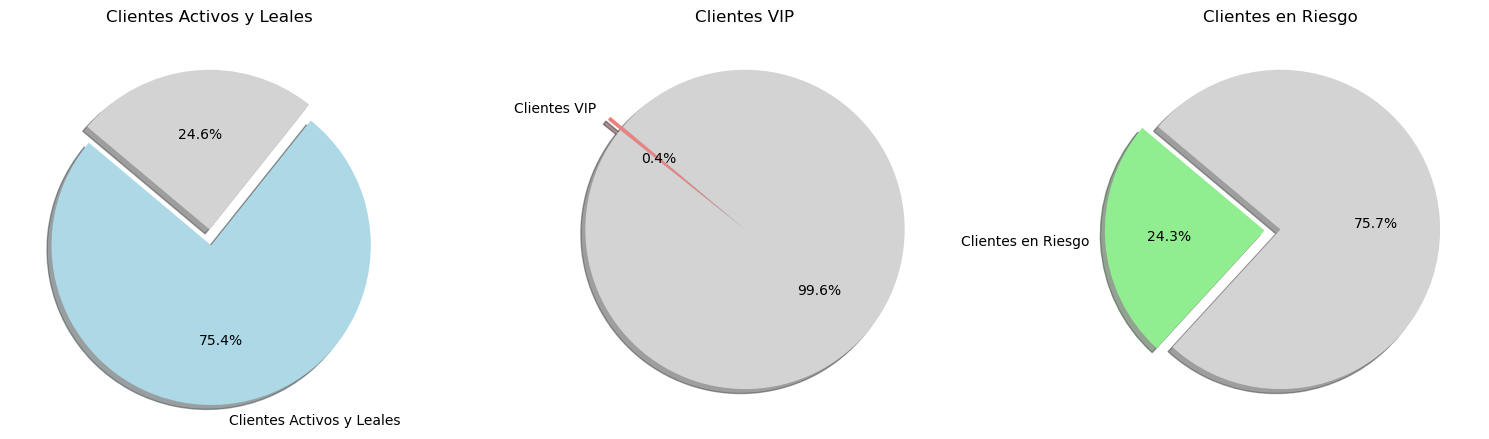

In [111]:
# Datos para los gráficos de pastel
labels = ['Clientes Activos y Leales', 'Clientes VIP', 'Clientes en Riesgo']
sizes = [3217, 13, 1037]
colors = ['lightblue', 'lightcoral', 'lightgreen']
explode = (0.1, 0, 0)  # explotar la primera rebanada para resaltarla

# Configuración del gráfico de pastel
plt.figure(figsize=(15, 5))

# Gráfico 1: Clientes Activos y Leales
plt.subplot(1, 3, 1)
plt.pie([sizes[0], sum(sizes[1:])], explode=(0.1, 0), labels=[labels[0], ''], colors=[colors[0], 'lightgray'],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Clientes Activos y Leales')

# Gráfico 2: Clientes VIP
plt.subplot(1, 3, 2)
plt.pie([sizes[1], sum(sizes[:1])], explode=(0.1, 0), labels=[labels[1], ''], colors=[colors[1], 'lightgray'],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Clientes VIP')

# Gráfico 3: Clientes en Riesgo
plt.subplot(1, 3, 3)
plt.pie([sizes[2], sum(sizes[:2])], explode=(0.1, 0), labels=[labels[2], ''], colors=[colors[2], 'lightgray'],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Clientes en Riesgo')

plt.tight_layout()
plt.show()


#### Cluster: Clientes Activos y Leales

##### Conteo de Clientes Activos y Leales: 3217 clientes en este grupo.
- Recencia Promedio: 39.62 días. Esto significa que, en promedio, estos clientes hicieron su última compra hace aproximadamente 40 días. Un valor menor indica que estos clientes han interactuado recientemente con la tienda.
- Frecuencia Promedio: 102.60 compras. En promedio, estos clientes han realizado alrededor de 103 compras.
- Monetario Promedio: 2036.79. Esta es la cantidad promedio de dinero gastado por compra. Indica que estos clientes tienden a realizar compras de menor valor promedio en comparación con otros clusters.
- Interpretación: Este cluster representa clientes que han realizado una cantidad significativa de compras y han interactuado recientemente con la tienda, aunque tienden a hacer compras de menor valor promedio.

#### Cluster: Clientes VIP

##### Conteo de Clientes VIP: 13 clientes en este grupo.
- Recencia Promedio: 3.00 días. Estos clientes han realizado compras muy recientemente, en promedio hace solo 3 días.
- Frecuencia Promedio: 2536.62 compras. Estos clientes tienen una frecuencia muy alta de compras, lo que indica que son extremadamente activos.
- Monetario Promedio: 125981.34. Estos clientes tienen un valor monetario promedio muy alto por compra.
- Interpretación: Este cluster representa a los clientes VIP de la tienda, caracterizados por realizar compras frecuentes y de alto valor. Son clientes extremadamente activos y de gran importancia para la tienda.

#### Cluster: Clientes en Riesgo

##### Conteo de Clientes en Riesgo: 1037 clientes en este grupo.
- Recencia Promedio: 244.57 días. Estos clientes hicieron su última compra hace aproximadamente 245 días en promedio.
- Frecuencia Promedio: 28.56 compras. Estos clientes tienen una frecuencia más baja de compras en comparación con los otros clusters.
- Monetario Promedio: 577.76. El valor monetario promedio por compra es más bajo en comparación con los otros clusters.
- Interpretación: Este cluster representa clientes que han mostrado menos interacción reciente con la tienda y tienen una frecuencia y valor monetario promedio de compras más bajos. Pueden representar un grupo de clientes que están en riesgo de dejar de ser activos.

## Conclusiones y recomendaciones
